# AI-DRIVEN OCULAR DISEASE DETECTION

# 1. Business Understanding

## 1.1 Project Background

Ocular diseases such as Diabetic Retinopathy (DR), Glaucoma, and Cataracts represent a significant and growing global health burden. These conditions are leading causes of preventable blindness worldwide. The key to preventing vision loss is early and accurate detection.

Currently, diagnosis relies on a manual examination of retinal fundus images by highly trained ophthalmologists. This process, while effective, faces several critical challenges:  

- **Scalability & Accessibility:** There is a global shortage of ophthalmologists, particularly in remote and underserved regions. This creates a severe bottleneck, leading to long wait times for screenings and delayed diagnoses.  

- **Time-Consuming & Repetitive:** Manual screening is a time-intensive task that consumes a significant portion of a specialist's day, much of which is spent reviewing normal, healthy eye scans.  

- **Human Factor:** The diagnostic process is subject to human fatigue and inter-observer variability, which can lead to inconsistent or missed findings.  

The convergence of deep learning, particularly in computer vision, and the increased availability of digital fundus imagery combined with patient metadata presents a transformative opportunity to address these challenges.

## 1.2 Problem Statement

The current manual screening process for ocular diseases is inefficient, unscalable, and inaccessible to large parts of the population, leading to preventable vision loss due to late detection.  

Healthcare providers require a tool that can automate the initial screening process. This tool must analyze a retinal fundus image and accurately identify the presence of multiple potential pathologies simultaneously, leveraging all available patient information for a more holistic assessment.  

This project addresses the need for an assistive tool by tackling this as a multi-label classification problem, where a single image can be flagged for one or more diseases, informed by patient demographics and comorbidities.

## 1.3 Project Objectives

The primary objective of this project is to develop and deploy a proof-of-concept Clinical Decision Support System (CDSS) for ophthalmologists and general practitioners. This system will leverage a deep learning model that integrates Retinal Scan data with patient structured data (age, known medical history) to serve as an automated, first-pass screening tool.

The specific, measurable objectives are:  

- **To Develop a Multi-Modal Model:** Build, train, and validate a fused model combining a Convolutional Neural Network (CNN) for image analysis with a classifier for structured patient metadata (e.g., Age, Hypertension status). The model must accurately detect eight distinct ocular pathologies from a single fundus image and supporting data: Normal, Diabetes, Glaucoma, Cataract, Age-related Macular Degeneration (AMD), Hypertension, Myopia, and Other abnormalities.  

- **To Prioritize Triage:** The model will act as a triage assistant to help clinicians prioritize patient caseloads by flagging high-risk images for immediate review.  

- **To Enhance Efficiency:** Automate screening of healthy/normal scans to reduce manual review burden on specialists, allowing them to focus on complex diagnoses and treatment.  

- **To Deploy an Accessible Tool:** Deploy the trained model as an interactive web application where users can upload retinal images and input patient features (age, comorbidities) to receive clear, probabilistic multi-label outputs.

## 1.4 Business Success Criteria

This academic project will be evaluated on both its technical performance and practical utility.

- **Primary Technical Metric (Multi-Modal Performance):** Mean Area Under the Receiver Operating Characteristic Curve (AUC-ROC) across all 8 classes, demonstrating the performance gain from incorporating structured patient data.  
  - *Target:* Mean AUC-ROC \( \geq 0.90 \) on the hold-out test set.  
  - *Rationale:* Effectively measures the ability to distinguish positive and negative cases, even for rare classes.  

- **Secondary Technical Metric:** Per-class F1-Score, Precision, and Recall to transparently show performance on common vs. rare conditions.  

- **Deployment & Utility Metric :** Successful deployment of a functional web-based application allowing users to upload fundus images and input mandatory metadata (age and at least one comorbidity like Hypertension) to receive a human-readable probabilistic output for all 8 disease categories, proving value as a CDSS.




In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# import os

# print("--- Starting Data Copy ---")

# # --- !!! YOU MUST CHANGE THIS PATH !!! ---
# # This must be the *exact* path to your folder on Google Drive
# gdrive_source_folder = "/content/drive/MyDrive/Training_Dataset_Final/Ocular_Dataset_9k"

# # This is the new local destination on the Colab machine
# local_destination_folder = "/content/Ocular_Dataset_9k"

# # Use !cp -r to recursively copy the entire folder
# # This will take 10-30 minutes, but it's much faster than file-by-file
# !cp -r "{gdrive_source_folder}" "{local_destination_folder}"

# print("\n--- COPY COMPLETE ---")
# print("Your data is now in /content/Ocular_Dataset_9k/")

### 2. INITIAL DATA EXPLORATION/ DATA UNDERSTANDING.

In [3]:
# IMPORT RELEVANT LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
# load the dataset
DF =  pd.read_csv('/kaggle/input/ocular-disease-recognition-odir5k/full_df.csv')
DF.head()

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg


In [5]:
# check tail
DF.tail()

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
6387,4686,63,Male,4686_left.jpg,4686_right.jpg,severe nonproliferative retinopathy,proliferative diabetic retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4686_left.jpg
6388,4688,42,Male,4688_left.jpg,4688_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4688_left.jpg
6389,4689,54,Male,4689_left.jpg,4689_right.jpg,mild nonproliferative retinopathy,normal fundus,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4689_left.jpg
6390,4690,57,Male,4690_left.jpg,4690_right.jpg,mild nonproliferative retinopathy,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4690_left.jpg
6391,4784,58,Male,4784_left.jpg,4784_right.jpg,hypertensive retinopathy，age-related macular d...,hypertensive retinopathy，age-related macular d...,0,0,0,0,1,1,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['H'],"[0, 0, 0, 0, 0, 1, 0, 0]",4784_left.jpg


In [6]:
# shape of dataset
print(f" This dataset has {DF.shape[0]} observations and {DF.shape[1]} variables")

 This dataset has 6392 observations and 19 variables


In [7]:
# Get metadata
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6392 entries, 0 to 6391
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   ID                         6392 non-null   int64 
 1   Patient Age                6392 non-null   int64 
 2   Patient Sex                6392 non-null   object
 3   Left-Fundus                6392 non-null   object
 4   Right-Fundus               6392 non-null   object
 5   Left-Diagnostic Keywords   6392 non-null   object
 6   Right-Diagnostic Keywords  6392 non-null   object
 7   N                          6392 non-null   int64 
 8   D                          6392 non-null   int64 
 9   G                          6392 non-null   int64 
 10  C                          6392 non-null   int64 
 11  A                          6392 non-null   int64 
 12  H                          6392 non-null   int64 
 13  M                          6392 non-null   int64 
 14  O       

In [8]:
# check null values
DF.isna().sum()

ID                           0
Patient Age                  0
Patient Sex                  0
Left-Fundus                  0
Right-Fundus                 0
Left-Diagnostic Keywords     0
Right-Diagnostic Keywords    0
N                            0
D                            0
G                            0
C                            0
A                            0
H                            0
M                            0
O                            0
filepath                     0
labels                       0
target                       0
filename                     0
dtype: int64

In [9]:
# duplicates
DF.duplicated().sum()

0

In [10]:
# Statistical information numeric
DF.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,6392.0,2271.150814,1417.559018,0.0,920.75,2419.5,3294.0,4784.0
Patient Age,6392.0,57.857947,11.727737,1.0,51.00,59.0,66.0,91.0
N,6392.0,0.328692,0.469775,0.0,0.00,0.0,1.0,1.0
D,6392.0,0.332134,0.471016,0.0,0.00,0.0,1.0,1.0
G,6392.0,0.062109,0.241372,0.0,0.00,0.0,0.0,1.0
C,6392.0,0.062891,0.242786,0.0,0.00,0.0,0.0,1.0
A,6392.0,0.049906,0.217768,0.0,0.00,0.0,0.0,1.0
H,6392.0,0.031758,0.175370,0.0,0.00,0.0,0.0,1.0
M,6392.0,0.047872,0.213513,0.0,0.00,0.0,0.0,1.0
O,6392.0,0.248436,0.432139,0.0,0.00,0.0,0.0,1.0


In [11]:
# Statistical information categorical
DF.describe(include='O').T

,count,unique,top,freq
Patient Sex,6392,2,Male,3424
Left-Fundus,6392,3358,4690_left.jpg,2
Right-Fundus,6392,3358,4690_right.jpg,2
Left-Diagnostic Keywords,6392,196,normal fundus,2796
Right-Diagnostic Keywords,6392,205,normal fundus,2705
filepath,6392,6392,../input/ocular-disease-recognition-odir5k/ODI...,1
labels,6392,8,['N'],2873
target,6392,8,"[1, 0, 0, 0, 0, 0, 0, 0]",2873
filename,6392,6392,4784_left.jpg,1


In [12]:
# check columns
DF.columns

Index(['ID', 'Patient Age', 'Patient Sex', 'Left-Fundus', 'Right-Fundus',
       'Left-Diagnostic Keywords', 'Right-Diagnostic Keywords', 'N', 'D', 'G',
       'C', 'A', 'H', 'M', 'O', 'filepath', 'labels', 'target', 'filename'],
      dtype='object')

In [13]:
# Explore value counts for each column
for column in DF.columns:
    print(f"Value counts for column '{column}':")
    print(DF[column].value_counts())
    print("\n")

Value counts for column 'ID':
ID
4690    2
4784    2
4677    2
4678    2
4679    2
       ..
1662    1
1710    1
1716    1
1965    1
1968    1
Name: count, Length: 3358, dtype: int64


Value counts for column 'Patient Age':
Patient Age
56    294
60    285
54    277
62    265
65    252
     ... 
15      2
14      2
18      2
27      2
17      2
Name: count, Length: 75, dtype: int64


Value counts for column 'Patient Sex':
Patient Sex
Male      3424
Female    2968
Name: count, dtype: int64


Value counts for column 'Left-Fundus':
Left-Fundus
4690_left.jpg    2
4784_left.jpg    2
4677_left.jpg    2
4678_left.jpg    2
4679_left.jpg    2
                ..
1662_left.jpg    1
1710_left.jpg    1
1716_left.jpg    1
1965_left.jpg    1
1968_left.jpg    1
Name: count, Length: 3358, dtype: int64


Value counts for column 'Right-Fundus':
Right-Fundus
4690_right.jpg    2
4784_right.jpg    2
4677_right.jpg    2
4678_right.jpg    2
4679_right.jpg    2
                 ..
1662_right.jpg    1
1710_right

### Dataset Overview

- **Total Images**: 6,392 eye photos
- **Total Patients**: 3,358 patients  
- **Left/Right Eyes**: Each patient has both eyes documented
- **Most Common Condition**: Normal (healthy) eyes
- **Key Diseases**: Diabetic Retinopathy, Cataract, Glaucoma
- **Age Range**: 14-91 years (mostly middle-aged to elderly)


## Dataset Column Descriptions

| Column Name | Description | Key Insights |
|-------------|-------------|-------------|
| **ID** | Patient identification number | • 3,358 unique patients<br>• Some patients have 2 entries |
| **Patient Age** | Age of patients | • Range: 14-91 years<br>• Most common: 56, 60, 54 years |
| **Patient Sex** | Gender of patients | • Male: 3,424<br>• Female: 2,968 |
| **Left-Fundus** | Left eye image filename | • Format: `ID_left.jpg`<br>• 3,358 unique values |
| **Right-Fundus** | Right eye image filename | • Format: `ID_right.jpg`<br>• 3,358 unique values |
| **Left-Diagnostic Keywords** | Doctor's notes for left eye | • 196 unique conditions<br>• Most common: "normal fundus" (2,796) |
| **Right-Diagnostic Keywords** | Doctor's notes for right eye | • 205 unique conditions<br>• Most common: "normal fundus" (2,705) |
| **N** | Normal (healthy) | • Normal: 4,291<br>• Abnormal: 2,101 |
| **D** | Diabetic Retinopathy | • Without: 4,269<br>• With: 2,123 |
| **G** | Glaucoma | • Without: 5,995<br>• With: 397 |
| **C** | Cataract | • Without: 5,990<br>• With: 402 |
| **A** | Age-related Macular Degeneration | • Without: 6,073<br>• With: 319 |
| **H** | Hypertension | • Without: 6,189<br>• With: 203 |
| **M** | Other diseases | • Without: 6,086<br>• With: 306 |
| **O** | Other abnormalities | • Without: 4,804<br>• With: 1,588 |
| **filepath** | Full image file path | • 6,392 unique paths<br>• Training images location |
| **labels** | Disease labels as text | • Most common: ['N'] = Normal (2,873) |
| **target** | Disease labels as binary array | • [1,0,0,0,0,0,0,0] = Normal<br>• [0,1,0,0,0,0,0,0] = Diabetic Retinopathy |
| **filename** | Image filename only | • 6,392 unique filenames |
er diseases
- **O**: Other abnormalities

# Data Understanding: Key Findings

In this phase, we performed an initial investigation of the **full_df.csv** file to understand our data before preparing it for modeling.

---

## Initial State of the DataFrame

### Complete Data
The dataset is **high-quality**, with **zero missing values** in any column.

### Good Columns
- **Patient Age** and the **8 disease columns** (`N`, `D`, `G`, `C`, `A`, `H`, `M`, `O`) were already clean.  
- These were stored as **integers**, which is ideal for modeling.

### Problem Columns
Three main columns required cleaning and transformation:
- **target**:  
  - Contained data in a string format such as `"[1, 0, 0, ...]"`.  
  - Although it looked like a list, it was actually stored as a string object.  
  - It needs to be converted into a **real list of integers**.
  
- **labels**:  
  - Stored as strings like `['N']`, not as actual Python lists.  
  - This column must be parsed into an appropriate list format.

- **Patient Sex**:  
  - Stored as a text column containing `"Male"` and `"Female"`.  
  - For modeling, it should be **encoded into numeric values**:
    - `0` for Male
    - `1` for Female

---

## Conclusion

The **raw dataset** is complete and of good quality but stored in non-numeric or inconsistent formats that prevent direct use in a modeling pipeline.

The next step, **Data Preparation**, will focus on fixing these data type issues by:
1. Converting the **target** string into actual lists of integers.  
2. Converting the **Patient Sex** column from text to numeric encoding.  
3. Creating a final, fully cleaned DataFrame that is **100% ready for model training**.

In [14]:
# import os

# # Count how many images you have
# image_folder = "preprocessed_images"  # ← change this to your folder
# files = os.listdir(image_folder)
# image_files = [f for f in files if f.endswith(('.jpg', '.png', '.jpeg'))]
# print(f"You have {len(image_files)} images")

In [15]:
# # check image sizes
# from PIL import Image

# # Check the first few images
# for i, img_file in enumerate(image_files[:5]):  # Check first 5
#     img_path = os.path.join(image_folder, img_file)
#     img = Image.open(img_path)
#     print(f"Image {i+1}: {img.size} (width x height)")

In [16]:
# # see what images look like
# import matplotlib.pyplot as plt

# # Display some sample images
# fig, axes = plt.subplots(2, 3, figsize=(12, 8))
# for i, ax in enumerate(axes.flat):
#     if i < len(image_files):
#         img_path = os.path.join(image_folder, image_files[i])
#         img = Image.open(img_path)
#         ax.imshow(img)
#         ax.set_title(f"Image {i+1}")
#         ax.axis('off')
# plt.show()

In [17]:
# !pip install opencv-python-headless

In [18]:
# # check blurry images
# import os
# import cv2
# import numpy as np
# from PIL import Image, ImageFile
# import matplotlib.pyplot as plt

# # Allow loading of truncated images
# ImageFile.LOAD_TRUNCATED_IMAGES = True

# def check_image_quality(image_folder):
#     image_files = [f for f in os.listdir(image_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

#     blurry_images = []
#     broken_images = []
#     good_images = []

#     for img_file in image_files:
#         img_path = os.path.join(image_folder, img_file)

#         try:
#             # Check if image is broken
#             with Image.open(img_path) as img:
#                 img.verify()  # Verify it's not corrupted

#             # Now check for blurriness
#             img_cv = cv2.imread(img_path)
#             if img_cv is not None:
#                 # Convert to grayscale
#                 gray = cv2.cvtColor(img_cv, cv2.COLOR_BGR2GRAY)

#                 # Calculate blurriness (lower value = more blurry)
#                 blur_value = cv2.Laplacian(gray, cv2.CV_64F).var()

#                 if blur_value < 100:  # Threshold for blurriness
#                     blurry_images.append((img_file, blur_value))
#                 else:
#                     good_images.append((img_file, blur_value))
#             else:
#                 broken_images.append(img_file)

#         except Exception as e:
#             broken_images.append(img_file)
#             print(f"Broken image: {img_file} - Error: {e}")

#     return blurry_images, broken_images, good_images

# # Run the check
# image_folder = "preprocessed_images"  # ← Change this!
# blurry, broken, good = check_image_quality(image_folder)

# print(f"Total images: {len(blurry) + len(broken) + len(good)}")
# print(f"Blurry images: {len(blurry)}")
# print(f"Broken images: {len(broken)}")
# print(f"Good images: {len(good)}")

# # Show some blurry examples
# if blurry:
#     print("\n--- Blurry Images (first 5) ---")
#     for img_name, blur_value in blurry[:5]:
#         print(f"{img_name}: blur score = {blur_value:.2f}")

# Image Dataset Analysis Report

#Dataset Overview

| Metric | Value |
|--------|-------|
| **Total Images** | 6,392 |
| **Good Quality Images** | 5,465 |
| **Blurry Images** | 927 |
| **Broken/Corrupted Images** | 0 |
| **Good Quality Percentage** | 85.5% |
| **Blurry Percentage** | 14.5%
---

##  Image Dimensions Analysis

| Aspect | Status |
|--------|--------|
| **Image Size** | 512 × 512 pixels |
| **Aspect Ratio** | 1:1 (Square) |  **Consistency** | All images standardized |
| **Format** | Uniform acrodataset |

---

##  Blur Analysis - Top 5 Blurry Images

| Image File | Blur Score | Severity |
|------------|------------|----------|
| `0_right.jpg` | 88.71 | Very Blurry |
| `1006_left.jpg` | 93.45 | Blurry |
| `1013_left.jpg` | 94.10 | Blurry |
| `1013_right.jpg` | 85.01 | Very Blurry |
| `1020_left.jpg` | 66.33 | Extremely Blurry |

*Note: Lowerur score = more blurry*

---

##  Quality Distribution

| Quality Category | Count | Percentage |
|------------------|-------|------------|
| **Excellent** | 5,465 | 85.5% |
| **Needs Review** | 927 |4.5% |
| **Corrupted** | 0 | 0% |

---

##  Strengths

| Strength | Impact |
|----------|--------|
| **Perfect standardization** | Ideal for batch processing |
| **Zero corrupted files** | Excellent data integrity |
| **Large dataset size** | Good for model training |
| * anized naming** | Easy to manage and track |

---

##  Areas for Improvement

| Issue | Recommendation |
|-------|----------------|
| **927 blurry images** | Consider removal or enhancement |
| **Quality variance** | Implement quality filtering |



### 3. DATA PREPARATION AND CLEANING

In [19]:
# create a copy of our dataframe
df = DF.copy()

In [20]:
# standardize colimn names
df.columns = [col.lower().replace(' ', '_').replace('-', '_') for col in df.columns]
df.columns

Index(['id', 'patient_age', 'patient_sex', 'left_fundus', 'right_fundus',
       'left_diagnostic_keywords', 'right_diagnostic_keywords', 'n', 'd', 'g',
       'c', 'a', 'h', 'm', 'o', 'filepath', 'labels', 'target', 'filename'],
      dtype='object')

In [21]:
# convert columns with 'int' for dtypes to 'object'
import ast
df['patient_sex'] = df['patient_sex'].astype('category')
df['left_diagnostic_keywords'] = df['left_diagnostic_keywords'].astype(str)
df['right_diagnostic_keywords'] = df['right_diagnostic_keywords'].astype(str)
df['target_list'] = df['target'].apply(ast.literal_eval)

In [22]:
import pandas as pd
import numpy as np
import ast
import re
import string

# --- Your original cell (Cell 29) ---
# This assumes 'df' is your DataFrame from cell 27/28
print("Running original type conversions...")
df['patient_sex'] = df['patient_sex'].astype('category')
df['left_diagnostic_keywords'] = df['left_diagnostic_keywords'].astype(str)
df['right_diagnostic_keywords'] = df['right_diagnostic_keywords'].astype(str)
df['target_list'] = df['target'].apply(ast.literal_eval)
print("Original conversions complete.")

# --- NEW: Code for creating the LLM feature column ---

print("\nCreating new 'llm_text_input' column...")

def clean_and_split_keywords(text):
    """
    Cleans a single keyword string by:
    1. Making it lowercase.
    2. Replacing the non-standard '，' comma with a standard comma.
    3. Splitting the string by the comma.
    """
    if text is None:
        return []
    
    text = str(text).lower()
    text = text.replace('，', ',') # Standardize comma
    
    # Split by comma, then strip whitespace from each item
    keywords = [k.strip() for k in text.split(',')]
    return keywords

# 1. Apply the cleaning function to both left and right columns
left_keywords = df['left_diagnostic_keywords'].apply(clean_and_split_keywords)
right_keywords = df['right_diagnostic_keywords'].apply(clean_and_split_keywords)

print("New column created.")
# 2. Combine the lists, get unique values, and re-join
combined_keywords_list = []
for i in range(len(df)):
    # Combine lists from both eyes
    all_keywords = left_keywords[i] + right_keywords[i]
    
    # Get unique, non-empty keywords. 
    # We explicitly filter out "normal fundus" because it's a lack of pathology, not a diagnosis.
    unique_keywords = set(k for k in all_keywords if k and k != 'normal fundus')
    
    # Join them with a standard comma and space.
    if not unique_keywords:
        # If the set is empty (e.g., both eyes were 'normal fundus'), we use a single 'normal' tag.
        combined_keywords_list.append('normal')
    else:
        # Otherwise, join the sorted, unique pathologies.
        combined_keywords_list.append(', '.join(sorted(list(unique_keywords))))

# 3. Create the new column in your DataFrame
df['llm_text_input'] = combined_keywords_list

print("New 'llm_text_input' column created successfully.")

# --- Show the results ---
print("\n--- Example of the transformation ---")
print(df[['left_diagnostic_keywords', 'right_diagnostic_keywords', 'llm_text_input']].head(3))



Running original type conversions...
Original conversions complete.

Creating new 'llm_text_input' column...
New column created.
New 'llm_text_input' column created successfully.

--- Example of the transformation ---
                            left_diagnostic_keywords  \
0                                           cataract   
1                                      normal fundus   
2  laser spot，moderate non proliferative retinopathy   

                right_diagnostic_keywords  \
0                           normal fundus   
1                           normal fundus   
2  moderate non proliferative retinopathy   

                                      llm_text_input  
0                                           cataract  
1                                             normal  
2  laser spot, moderate non proliferative retinop...  


In [23]:
# --- 5. Define the LLM simulation function ---
print("Defining the rule-based LLM simulation function...")

def extract_features_from_text(text):
    """
    Simulates an LLM by extracting structured features
    from the diagnostic keyword text.
    """
    text_lower = str(text).lower()
    
    # Set defaults
    severity = 'unknown'
    prognosis = 'unknown'
    
    # 1. Check for severity keywords (highest priority first)
    if 'proliferative' in text_lower or 'severe' in text_lower:
        severity = 'severe'
        prognosis = 'poor'
    elif 'moderate' in text_lower:
        severity = 'moderate'
        prognosis = 'guarded'
    elif 'mild' in text_lower:
        severity = 'mild'
        prognosis = 'good'
        
    # 2. Check for specific disease keywords (if no severity was found)
    elif 'glaucoma' in text_lower:
        severity = 'moderate'
        prognosis = 'guarded'
    elif 'amd' in text_lower or 'age-related macular degeneration' in text_lower:
        severity = 'moderate'
        prognosis = 'guarded'
    elif 'cataract' in text_lower:
        severity = 'moderate'
        prognosis = 'good' # Cataract prognosis is generally good
    elif 'hypertensive' in text_lower:
        severity = 'moderate'
        prognosis = 'guarded'
    elif 'myopia' in text_lower:
        severity = 'mild'
        prognosis = 'stable'
        
    # 3. Handle 'normal'
    elif 'normal' == text_lower:
        severity = 'none'
        prognosis = 'excellent'
        
    # 4. Catch-all for other non-normal keywords
    elif severity == 'unknown':
        severity = 'other'
        prognosis = 'variable'
        
    return pd.Series([severity, prognosis])

# --- 6. Map the new features back to the DataFrame ---
print("Applying function to create 'llm_severity' and 'llm_prognosis' columns...")

df[['llm_severity', 'llm_prognosis']] = df['llm_text_input'].apply(extract_features_from_text)

print("New feature columns created successfully.")

# --- 7. Display the results ---
print("\n--- DataFrame with new LLM-like features ---")
print(df[['llm_text_input', 'llm_severity', 'llm_prognosis']].head())

print("\n--- Distribution of new 'llm_severity' feature ---")
print(df['llm_severity'].value_counts())

print("\n--- Distribution of new 'llm_prognosis' feature ---")
print(df['llm_prognosis'].value_counts())

Defining the rule-based LLM simulation function...
Applying function to create 'llm_severity' and 'llm_prognosis' columns...
New feature columns created successfully.

--- DataFrame with new LLM-like features ---
                                      llm_text_input llm_severity  \
0                                           cataract     moderate   
1                                             normal         none   
2  laser spot, moderate non proliferative retinop...       severe   
3  macular epiretinal membrane, mild nonprolifera...       severe   
4             moderate non proliferative retinopathy       severe   

  llm_prognosis  
0          good  
1     excellent  
2          poor  
3          poor  
4          poor  

--- Distribution of new 'llm_severity' feature ---
llm_severity
severe      2062
none        2004
moderate    1065
other       1006
mild         255
Name: count, dtype: int64

--- Distribution of new 'llm_prognosis' feature ---
llm_prognosis
poor         2062
exc

In [24]:
def query_llm_api_simulation(text):
    text_lower = str(text).lower()
    severity, prognosis, confidence = 'unknown', 'unknown', 1.0
    if 'proliferative' in text_lower or 'severe' in text_lower: (severity, prognosis) = ('severe', 'poor')
    elif 'moderate' in text_lower: (severity, prognosis) = ('moderate', 'guarded')
    elif 'mild' in text_lower: (severity, prognosis) = ('mild', 'good')
    elif 'glaucoma' in text_lower: (severity, prognosis) = ('moderate', 'guarded')
    elif 'amd' in text_lower: (severity, prognosis) = ('moderate', 'guarded')
    elif 'cataract' in text_lower: (severity, prognosis) = ('moderate', 'good')
    elif 'hypertensive' in text_lower: (severity, prognosis) = ('moderate', 'guarded')
    elif 'myopia' in text_lower: (severity, prognosis) = ('mild', 'stable')
    elif 'normal' == text_lower: (severity, prognosis) = ('none', 'excellent')
    elif severity == 'unknown': (severity, prognosis) = ('other', 'variable')
    return pd.Series([severity, prognosis, confidence])

df[['llm_severity', 'llm_prognosis', 'llm_confidence']] = df['llm_text_input'].apply(query_llm_api_simulation)

# --- 1d. Encode LLM features to numbers
severity_map = {'severe': 4.0, 'moderate': 3.0, 'mild': 2.0, 'stable': 1.0, 'none': 0.0, 'other': 2.0, 'variable': 2.0, 'unknown': 2.0}
prognosis_map = {'poor': 3.0, 'guarded': 2.0, 'good': 1.0, 'stable': 1.0, 'excellent': 0.0, 'variable': 2.0, 'unknown': 2.0}
df['llm_severity_encoded'] = df['llm_severity'].map(severity_map)
df['llm_prognosis_encoded'] = df['llm_prognosis'].map(prognosis_map)
df['llm_confidence_encoded'] = df['llm_confidence']

print("6k 'df' with all features engineered.")

6k 'df' with all features engineered.


In [25]:
df.head()

,id,patient_age,patient_sex,left_fundus,right_fundus,left_diagnostic_keywords,right_diagnostic_keywords,n,d,g,...,target,filename,target_list,llm_text_input,llm_severity,llm_prognosis,llm_confidence,llm_severity_encoded,llm_prognosis_encoded,llm_confidence_encoded
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,...,"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg,"[1, 0, 0, 0, 0, 0, 0, 0]",cataract,moderate,good,1.0,3.0,1.0,1.0
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,...,"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg,"[1, 0, 0, 0, 0, 0, 0, 0]",normal,none,excellent,1.0,0.0,0.0,1.0
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,...,"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg,"[0, 1, 0, 0, 0, 0, 0, 0]","laser spot, moderate non proliferative retinop...",severe,poor,1.0,4.0,3.0,1.0
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,...,"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg,"[0, 1, 0, 0, 0, 0, 0, 0]","macular epiretinal membrane, mild nonprolifera...",severe,poor,1.0,4.0,3.0,1.0
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,...,"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg,"[0, 1, 0, 0, 0, 0, 0, 0]",moderate non proliferative retinopathy,severe,poor,1.0,4.0,3.0,1.0


In [26]:
unique_texts = df['llm_text_input'].unique()
print(f"Total unique diagnostic keyword combinations: {len(unique_texts)}")

Total unique diagnostic keyword combinations: 330


### Dropping Redundant Columns

To finalize the dataset for modeling, we will remove columns that are no longer necessary.

-   `ID`: Not a unique identifier for rows (we are using `filenam

We shall drop the other columns during pre-processing.olumns.

In [27]:
df = df.drop('id', axis = 1)
df

,patient_age,patient_sex,left_fundus,right_fundus,left_diagnostic_keywords,right_diagnostic_keywords,n,d,g,c,...,target,filename,target_list,llm_text_input,llm_severity,llm_prognosis,llm_confidence,llm_severity_encoded,llm_prognosis_encoded,llm_confidence_encoded
0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,...,"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg,"[1, 0, 0, 0, 0, 0, 0, 0]",cataract,moderate,good,1.0,3.0,1.0,1.0
1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,...,"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg,"[1, 0, 0, 0, 0, 0, 0, 0]",normal,none,excellent,1.0,0.0,0.0,1.0
2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,...,"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg,"[0, 1, 0, 0, 0, 0, 0, 0]","laser spot, moderate non proliferative retinop...",severe,poor,1.0,4.0,3.0,1.0
3,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,...,"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg,"[0, 1, 0, 0, 0, 0, 0, 0]","macular epiretinal membrane, mild nonprolifera...",severe,poor,1.0,4.0,3.0,1.0
4,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,...,"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg,"[0, 1, 0, 0, 0, 0, 0, 0]",moderate non proliferative retinopathy,severe,poor,1.0,4.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6387,63,Male,4686_left.jpg,4686_right.jpg,severe nonproliferative retinopathy,proliferative diabetic retinopathy,0,1,0,0,...,"[0, 1, 0, 0, 0, 0, 0, 0]",4686_left.jpg,"[0, 1, 0, 0, 0, 0, 0, 0]","proliferative diabetic retinopathy, severe non...",severe,poor,1.0,4.0,3.0,1.0
6388,42,Male,4688_left.jpg,4688_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,...,"[0, 1, 0, 0, 0, 0, 0, 0]",4688_left.jpg,"[0, 1, 0, 0, 0, 0, 0, 0]",moderate non proliferative retinopathy,severe,poor,1.0,4.0,3.0,1.0
6389,54,Male,4689_left.jpg,4689_right.jpg,mild nonproliferative retinopathy,normal fundus,0,1,0,0,...,"[0, 1, 0, 0, 0, 0, 0, 0]",4689_left.jpg,"[0, 1, 0, 0, 0, 0, 0, 0]",mild nonproliferative retinopathy,severe,poor,1.0,4.0,3.0,1.0
6390,57,Male,4690_left.jpg,4690_right.jpg,mild nonproliferative retinopathy,mild nonproliferative retinopathy,0,1,0,0,...,"[0, 1, 0, 0, 0, 0, 0, 0]",4690_left.jpg,"[0, 1, 0, 0, 0, 0, 0, 0]",mild nonproliferative retinopathy,severe,poor,1.0,4.0,3.0,1.0


In [28]:
# check if all images match to our dataset
IMAGE_DIR = '/kaggle/input/ocular-disease-recognition-odir5k/preprocessed_images'

try:
    # Get all filenames from your image folder
    image_files_on_disk = set(os.listdir(IMAGE_DIR))
    print(f"Found {len(image_files_on_disk)} images in {IMAGE_DIR}")

    # 1. Check for rows in the CSV that have no matching image
    initial_rows = len(df)
    # .isin() is very fast for checking against a set
    df = df[df['filename'].isin(image_files_on_disk)]
    final_rows = len(df)

    if (initial_rows - final_rows) > 0:
        print(f"Cleaned: Removed {initial_rows - final_rows} CSV rows that had no matching image in the folder.")
    else:
        print("CSV Check: All filenames in 'full_df.csv' have a matching image.")

    # 2. Check for images in the folder that have no CSV row (unlabeled data)
    csv_filenames = set(df['filename'])
    unlabeled_images = image_files_on_disk - csv_filenames

    if unlabeled_images:
        print(f"WARNING: Found {len(unlabeled_images)} images in your folder that are not in the CSV.")
        # print(f"First 5 unlabeled images: {list(unlabeled_images)[:5]}") # Uncomment to see them
    else:
        print("Image Check: All images in your folder have a matching row in the CSV.")

except FileNotFoundError:
    print(f"WARNING: Image directory not found at '{IMAGE_DIR}'.")
    print("Skipping image file synchronization. The CSV will NOT be filtered.")
except Exception as e:
    print(f"An error occurred during image sync: {e}")

An error occurred during image sync: name 'os' is not defined


## 4. EXPLORATORY DATA ANALYSIS
### UNIVARIATE ANALYSIS


--- Univariate: Patient Age ---
count    6392.000000
mean       57.857947
std        11.727737
min         1.000000
25%        51.000000
50%        59.000000
75%        66.000000
max        91.000000
Name: patient_age, dtype: float64


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


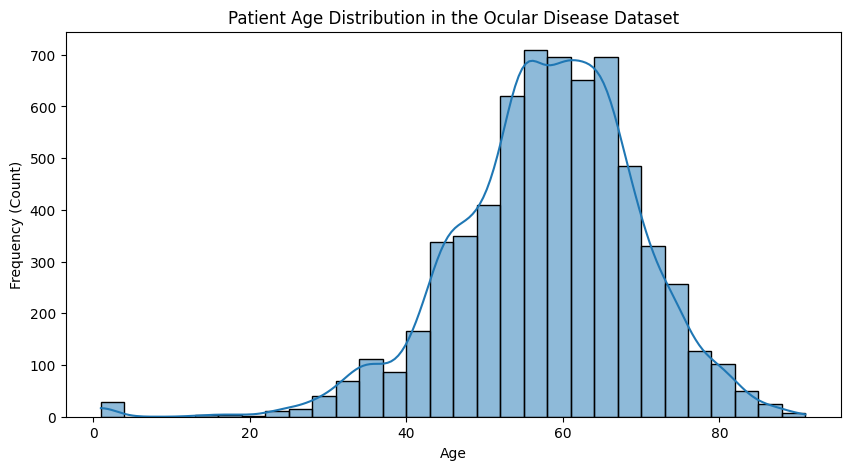

In [29]:
# --- Patient Age ---
print("\n--- Univariate: Patient Age ---")
print(df['patient_age'].describe())

plt.figure(figsize=(10, 5))
sns.histplot(df['patient_age'], kde=True, bins=30)
plt.title('Patient Age Distribution in the Ocular Disease Dataset')
plt.xlabel('Age')
plt.ylabel('Frequency (Count)')
plt.show()

#### Observations:Patient Age Distribution
- The dataset contains 6392 records of eye patients whose ages range from 1 to 91 years. The histogram shows that the average patient age is approximately 58 years. The standrd deviation is 11.7 years, indicating moderate variability in age distribution.
- The interquartile range (IQR = Upper Quartile Minus Lower Quartile) spans from 51 to 66 years, showing that most patients fall within the middle aged and senior adult groups.
- The histogram is nearly bell-shaped, indicating theat the distribution is near -normal distribution and slightly skewed towards the older ages. This pattern implies that the most of patients in the dataset are adults and elderly individuals and they are at higher risk for ocular diseases such as glaucoma, cataracts, and diabetic retinopathy.
- Therefore, the ages in the dataset are mostly for older people, but there are a few younger patients too, which makes the curve stretch a little more on the left side. Statistically, the distribution is skewed to the left.
- Additionally, the histogram shows that there are very few younger patients, specifically those below 20 years, who constitute a very small proportion of the population, indicating that this dataset focused on age groups most prone to age-related visual impairments.


--- Univariate: Patient Sex ---
patient_sex
Male      0.53567
Female    0.46433
Name: proportion, dtype: float64


/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


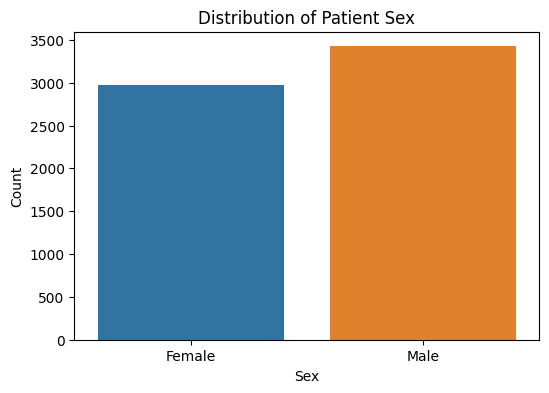

In [30]:
# --- Patient Sex ---
print("\n--- Univariate: Patient Sex ---")
print(df['patient_sex'].value_counts(normalize=True))

plt.figure(figsize=(6, 4))
sns.countplot(x='patient_sex', data=df)
plt.title('Distribution of Patient Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

#### Observations:Distribution of the Patient Sex
- The above countplot shows that 53.6% of the patients consititutes the males which is the majority while 46.4% female participants.
- The dataset is fairly balanced by gender, which is important for model development.
- A well balanced number of male and female patients helps prevent gender bias and makes sure the model works well for both groups.
- Therefore, the small difference reflect real-world clinical patterns, where certain ocular diseases such as glaucoma, and diabetic retinopathy are mostly observed in males.


--- Univariate: Target Label (Disease) Distribution ---
d    2123
n    2101
o    1588
c     402
g     397
a     319
m     306
h     203
dtype: int64


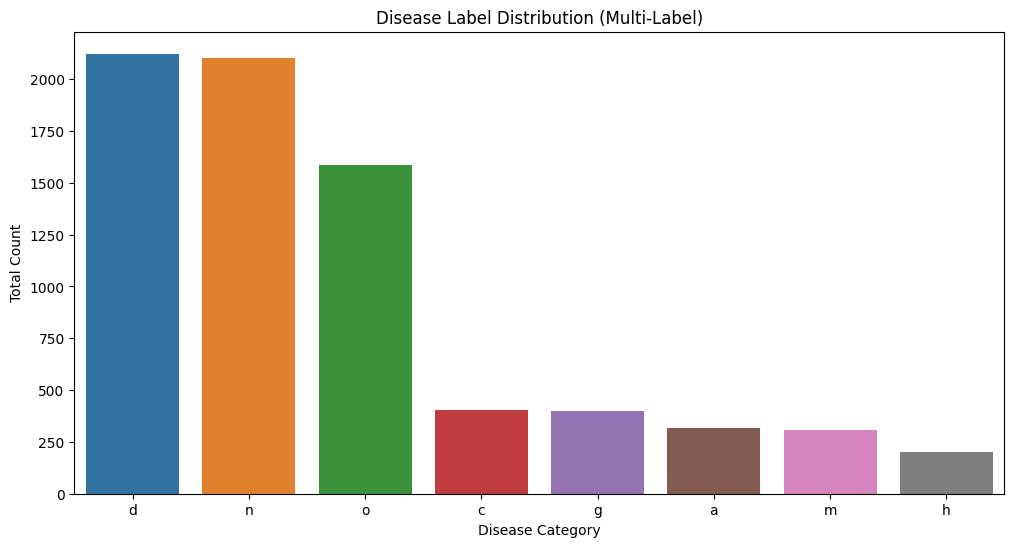

In [31]:
# --- Target Labels (Diseases) ---
print("\n--- Univariate: Target Label (Disease) Distribution ---")
# N=Normal, D=Diabetes, G=Glaucoma, C=Cataract, A=AMD, H=Hypertension, M=Myopia, O=Other
Ohe_cols = df[['n', 'd', 'g', 'c', 'a', 'h', 'm', 'o']]

disease_counts = Ohe_cols.sum().sort_values(ascending=False)
print(disease_counts)

plt.figure(figsize=(12, 6))
sns.barplot(x=disease_counts.index, y=disease_counts.values)
plt.title('Disease Label Distribution (Multi-Label)')
plt.xlabel('Disease Category')
plt.ylabel('Total Count')
plt.show()

#### Observations:Disease Label Distribution
- The dataset covers eight ocular disease categories, Normal (n), Myopia (m), Diabetes (d), Glaucoma (g), Cataract (c), Hypertension (h), Age-related Macular Degeneration (a), and Other abnormalities (o).
- The histogram hows that Diabetes and Normal are the most common disease categories, each with over 2,000 samples, followed by Other abnormalities which is approximately 1600. The remaining diseases including Cataract, Glaucoma, AMD, Myopia, and Hypertension, have fewer than 500 samples showing a  class imbalance where some conditions occur more frequently, but it may cause the model to favor common diseases.
- We will address this imbalance to  ensure that the model detects both common and rare ocular conditions effectively.

### BIVARIATE ANALYSIS


--- Bivariate: Age vs. Disease ---


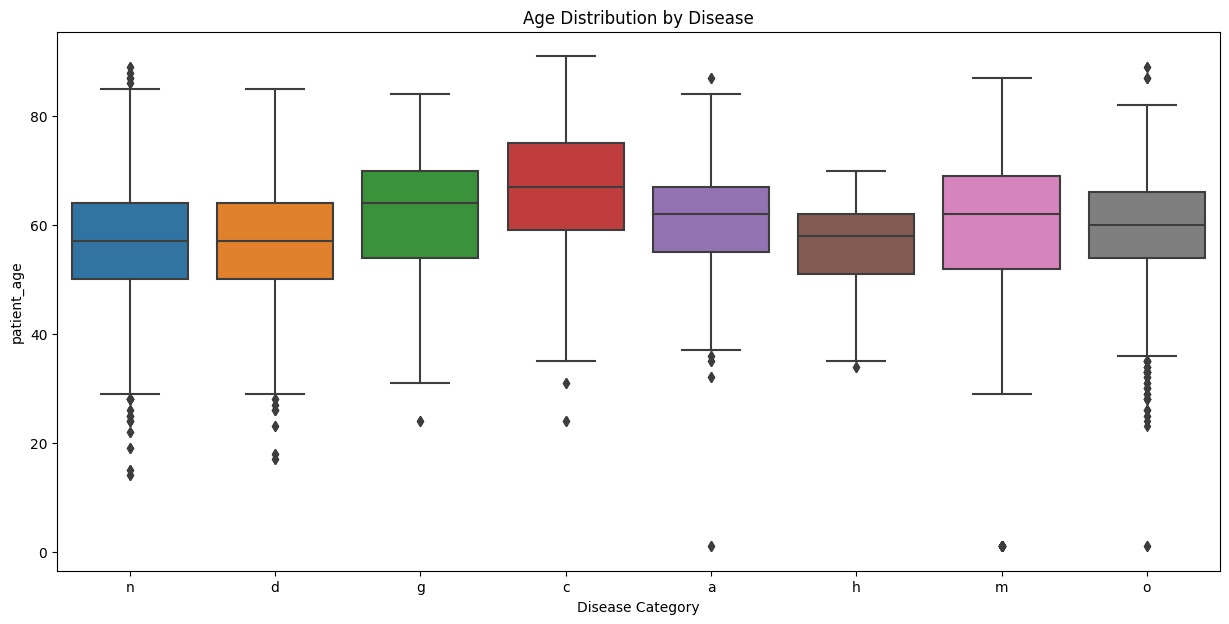

In [32]:
# --- Age vs. Disease ---
print("\n--- Bivariate: Age vs. Disease ---")

# We need to "melt" the DataFrame to make it easy for seaborn to plot
melted_df = df.melt(
    id_vars=['patient_age', 'patient_sex'],
    value_vars=Ohe_cols,
    var_name='Disease',
    value_name='Has_Disease'
)
# We only want to plot for rows where the disease is present (Has_Disease == 1)
disease_present_df = melted_df[melted_df['Has_Disease'] == 1]

plt.figure(figsize=(15, 7))
sns.boxplot(x='Disease', y='patient_age', data=disease_present_df)
plt.title('Age Distribution by Disease')
plt.xlabel('Disease Category')
plt.ylabel('patient_age')
plt.show()

#### Observations:Age Versus Disease.
- The boxplot above compares patient age across different ocular diseases. Each box represents how ages are spread for patients diagnosed with a particular condition.
- Overall, older patients (mostly above 50 years) dominate diseases such as Diabetes (d), Cataract (c), Glaucoma (g), and Age-related Macular Degeneration (a). In contrast, younger patients are more common in the Normal (n) and Myopia (m) groups.
- This pattern shows that age is strongly linked to ocular disease occurrence with most conditions being age-related, while normal vision and myopia are more frequent among younger individuals.


--- Bivariate: Sex vs. Disease ---


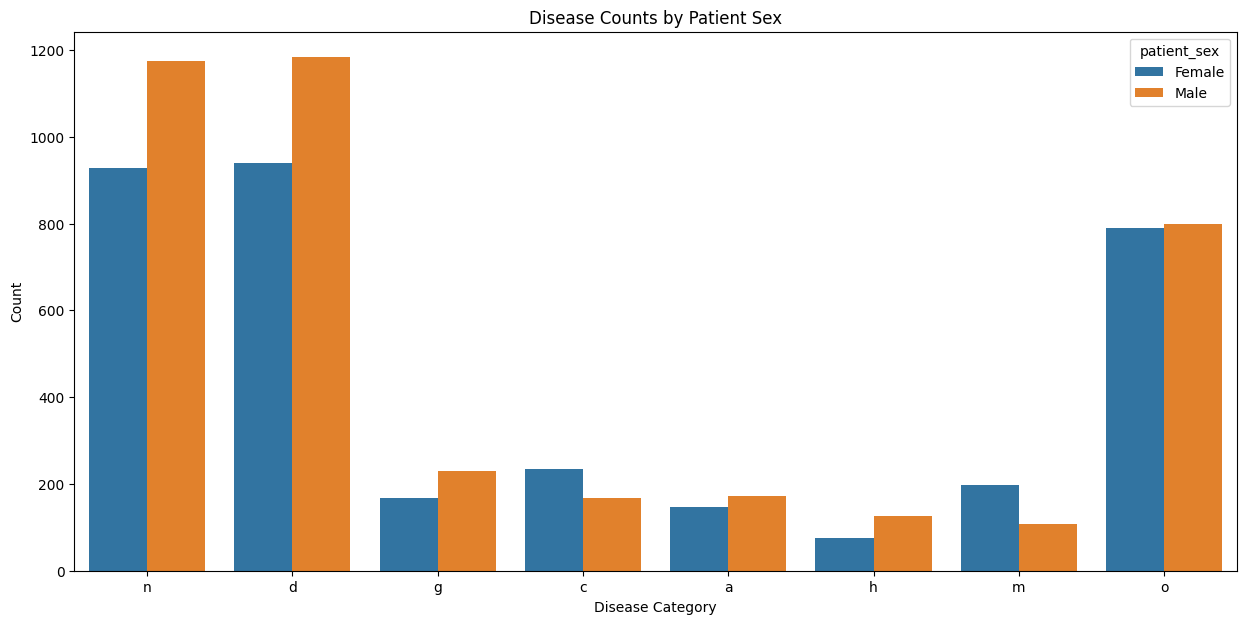

In [33]:
# --- Sex vs. Disease ---
print("\n--- Bivariate: Sex vs. Disease ---")
# We can re-use the 'disease_present_df' we created above

plt.figure(figsize=(15, 7))
# We use 'hue' to split the bars by 'Patient Sex'
sns.countplot(x='Disease', hue='patient_sex', data=disease_present_df)
plt.title('Disease Counts by Patient Sex')
plt.xlabel('Disease Category')
plt.ylabel('Count')
plt.show()

#### Observations:Sex Versus Type of Disease
- The chart above compares the frequency of ocular diseases between male and female patients.  Each bar shows how many cases of each disease are associated with each sex. Understanding how ocular disease distribution varies by gender is important because it helps identify potential demographic trends and ensures the model remains unbiased across patient groups.
- The bar plot shows that the male patients have slightly higher counts in Normal (n) and Diabetes (d). The Normal and the Diabetes are the  most frequent categories overall.
- Female patients show marginally higher counts in Cataract (c) and Myopia (m) categories.
- For Glaucoma(g), Age-related Macular Degeneration(a), Hypertension(h), and Other abnormalities(o), the differences between males and females are minimal.
- Overall, sex is not a major determinant of ocular disease in this dataset, and the balanced representation supports fair and unbiased model learning.


--- Bivariate: Patient Age vs. Patient Sex ---
              count       mean        std   min   25%   50%   75%   max
patient_sex                                                            
Female       2968.0  59.025943  12.228377   1.0  53.0  60.0  66.0  89.0
Male         3424.0  56.845502  11.179272  15.0  50.0  57.0  65.0  91.0


/tmp/ipykernel_37/1636993668.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('patient_sex')['patient_age'].describe())
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


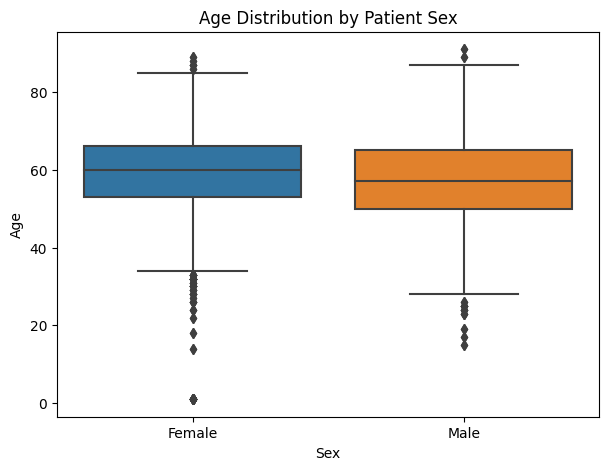

In [34]:

# --- Bivariate Plot: Age vs. Sex ---
print("\n--- Bivariate: Patient Age vs. Patient Sex ---")
print(df.groupby('patient_sex')['patient_age'].describe())

plt.figure(figsize=(7, 5))
sns.boxplot(x='patient_sex', y='patient_age', data=df)
plt.title('Age Distribution by Patient Sex')
plt.xlabel('Sex')
plt.ylabel('Age')
plt.show()

#### Observations: Age Distribution by Patient Sex.
- The average age for female patients is about 59 years, while for male patients it is around 57 years.
- The age range is similar for both groups, spanning from early adulthood to about 90 years.
- Both distributions show several outliers among younger patients, but the general spread is consistent across board.
- Therefore ,the two genders are well across a similar age range, with only a small difference in their mean ages. Females tend to be slightly older on average, which may reflect real-world trends where women often experience longer life expectancy and later onset of certain ocular conditions.

### MULTIVARIATE ANALYSIS


--- Multivariate: Disease Co-occurrence Heatmap ---


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


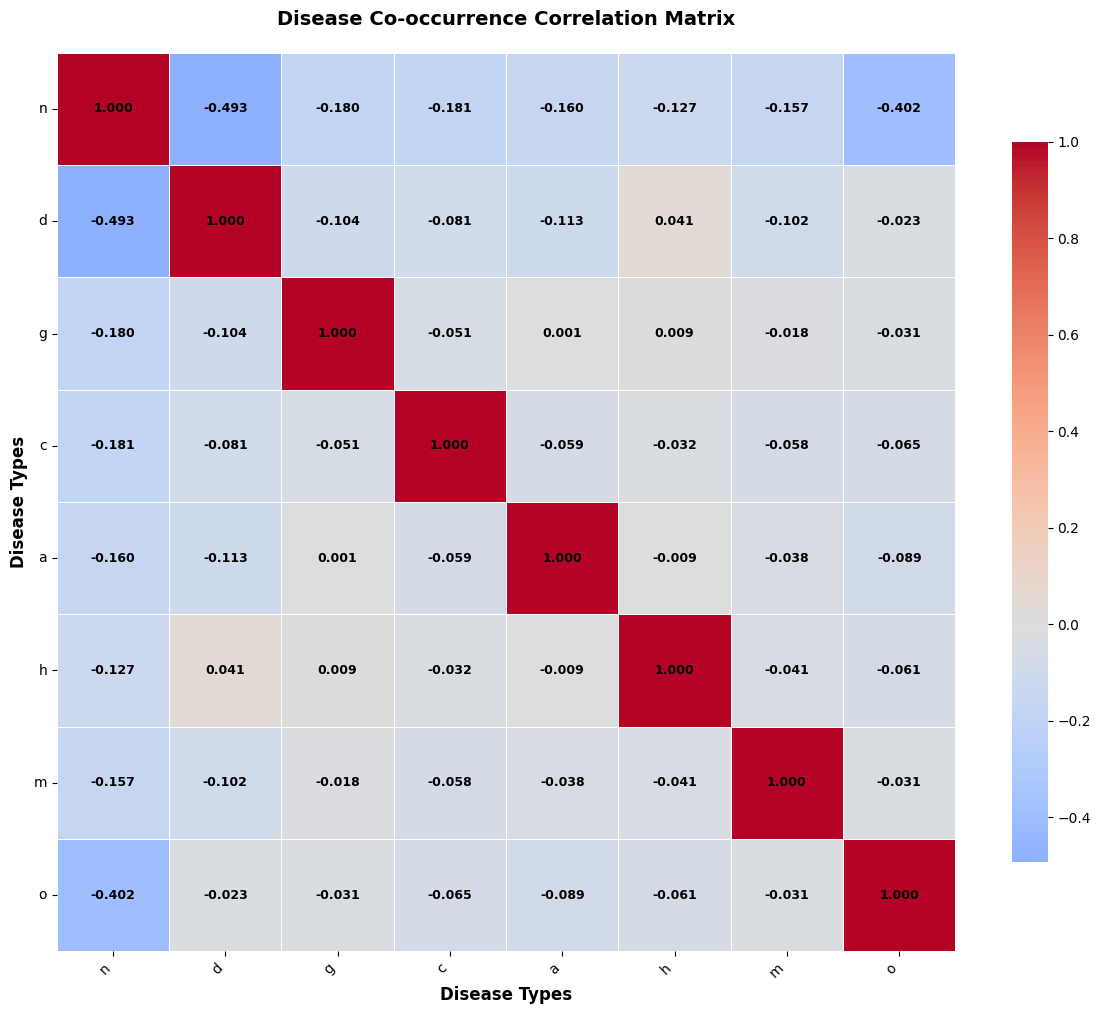

In [35]:
# --- Disease Co-occurrence ---
print("\n--- Multivariate: Disease Co-occurrence Heatmap ---")

correlation_matrix = Ohe_cols.corr()

fig, ax = plt.subplots(figsize=(12, 10))

# Create heatmap without annotations first
heatmap = sns.heatmap(
    correlation_matrix,
    annot=False,
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.5,
    linecolor='white',
    cbar_kws={'shrink': 0.8},
    ax=ax
)

# Manually add annotations to every cell
for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix)):
        text = ax.text(j + 0.5, i + 0.5, f'{correlation_matrix.iloc[i, j]:.3f}',
                       ha="center", va="center", color="black", fontsize=9, weight='bold')

plt.title('Disease Co-occurrence Correlation Matrix', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Disease Types', fontsize=12, fontweight='bold')
plt.ylabel('Disease Types', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

#### Observations: Disease Co-occurrence Correlation Matrix
- The heatmap above visualizes the correlation between different ocular diseases, showing how often they co-occur in patients.
- Correlation values range from –1 to +1, where:
+1 indicates perfect positive correlation (diseases occur together frequently)  and –1 indicates perfect negative correlation (if one occurs, the other rarely does).
From the matrix:
- Most disease pairs show weak or negative correlations, meaning they tend to occur independently.
- The strongest negative correlations are between Normal (n) and other diseases, especially Diabetes (d) (–0.49) and Other abnormalities (o) (–0.40). This is expected since “Normal” indicates the absence of disease.
- Slight positive relationships (near zero) between some conditions, such as Hypertension (h) and Diabetes (d), may suggest that the patient has 2 or more diseases.
- Overall, the results show that ocular diseases rarely co-occur in the same patient, with the Normal class acting as a clear opposite of disease presence.

In [36]:
df.head()

,patient_age,patient_sex,left_fundus,right_fundus,left_diagnostic_keywords,right_diagnostic_keywords,n,d,g,c,...,target,filename,target_list,llm_text_input,llm_severity,llm_prognosis,llm_confidence,llm_severity_encoded,llm_prognosis_encoded,llm_confidence_encoded
0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,...,"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg,"[1, 0, 0, 0, 0, 0, 0, 0]",cataract,moderate,good,1.0,3.0,1.0,1.0
1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,...,"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg,"[1, 0, 0, 0, 0, 0, 0, 0]",normal,none,excellent,1.0,0.0,0.0,1.0
2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,...,"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg,"[0, 1, 0, 0, 0, 0, 0, 0]","laser spot, moderate non proliferative retinop...",severe,poor,1.0,4.0,3.0,1.0
3,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,...,"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg,"[0, 1, 0, 0, 0, 0, 0, 0]","macular epiretinal membrane, mild nonprolifera...",severe,poor,1.0,4.0,3.0,1.0
4,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,...,"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg,"[0, 1, 0, 0, 0, 0, 0, 0]",moderate non proliferative retinopathy,severe,poor,1.0,4.0,3.0,1.0


### STATISTICAL TESTING ON HYPOTHESIS

In [37]:
from scipy import stats
from scipy.stats import chi2_contingency, mannwhitneyu, kruskal, ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
# df = pd.read_csv('/kaggle/input/ocular-disease-recognition-odir5k/full_df.csv')

print("="*80)
print("HYPOTHESIS TESTS FOR OCULAR DISEASE DETECTION DATASET")
print("="*80)

# Create binary disease indicator (0 = normal, 1 = disease)
df['has_disease'] = ((df['left_diagnostic_keywords'] != 'normal fundus') | 
                     (df['right_diagnostic_keywords'] != 'normal fundus')).astype(int)

# ==============================================================================
# TEST 1: Chi-Square Test - Association between Sex and Disease Presence
# ==============================================================================
print("\n1. CHI-SQUARE TEST: Sex vs Disease Presence")
print("-" * 80)
print("H0: Sex and disease presence are independent")
print("H1: Sex and disease presence are associated\n")

contingency_sex = pd.crosstab(df['patient_sex'], df['has_disease'])
chi2_sex, p_sex, dof_sex, expected_sex = chi2_contingency(contingency_sex)

print(f"Contingency Table:\n{contingency_sex}\n")
print(f"Chi-square statistic: {chi2_sex:.4f}")
print(f"P-value: {p_sex:.4f}")
print(f"Degrees of freedom: {dof_sex}")
print(f"Result: {'Reject H0' if p_sex < 0.05 else 'Fail to reject H0'} (α = 0.05)")
print(f"Interpretation: {'Significant' if p_sex < 0.05 else 'No significant'} association between sex and disease presence")

HYPOTHESIS TESTS FOR OCULAR DISEASE DETECTION DATASET

1. CHI-SQUARE TEST: Sex vs Disease Presence
--------------------------------------------------------------------------------
H0: Sex and disease presence are independent
H1: Sex and disease presence are associated

Contingency Table:
has_disease     0     1
patient_sex            
Female        874  2094
Male         1128  2296

Chi-square statistic: 8.8740
P-value: 0.0029
Degrees of freedom: 1
Result: Reject H0 (α = 0.05)
Interpretation: Significant association between sex and disease presence


In [38]:
df.columns

Index(['patient_age', 'patient_sex', 'left_fundus', 'right_fundus',
       'left_diagnostic_keywords', 'right_diagnostic_keywords', 'n', 'd', 'g',
       'c', 'a', 'h', 'm', 'o', 'filepath', 'labels', 'target', 'filename',
       'target_list', 'llm_text_input', 'llm_severity', 'llm_prognosis',
       'llm_confidence', 'llm_severity_encoded', 'llm_prognosis_encoded',
       'llm_confidence_encoded', 'has_disease'],
      dtype='object')

In [39]:
# ==============================================================================
# TEST 4: Chi-Square Test - Left vs Right Eye Disease Association
# ==============================================================================
print("\n\n4. CHI-SQUARE TEST: Left Eye Disease vs Right Eye Disease")
print("-" * 80)
print("H0: Left and right eye disease status are independent")
print("H1: Left and right eye disease status are associated\n")

df['left_disease'] = (df['left_diagnostic_keywords'] != 'normal fundus').astype(int)
df['right_disease'] = (df['right_diagnostic_keywords'] != 'normal fundus').astype(int)

contingency_eyes = pd.crosstab(df['left_disease'], df['right_disease'])
chi2_eyes, p_eyes, dof_eyes, expected_eyes = chi2_contingency(contingency_eyes)

print(f"Contingency Table:\n{contingency_eyes}\n")
print(f"Chi-square statistic: {chi2_eyes:.4f}")
print(f"P-value: {p_eyes:.8e}")
print(f"Degrees of freedom: {dof_eyes}")
print(f"Result: {'Reject H0' if p_eyes < 0.05 else 'Fail to reject H0'} (α = 0.05)")
print(f"Interpretation: {'Significant' if p_eyes < 0.05 else 'No significant'} association between left and right eye disease")



4. CHI-SQUARE TEST: Left Eye Disease vs Right Eye Disease
--------------------------------------------------------------------------------
H0: Left and right eye disease status are independent
H1: Left and right eye disease status are associated

Contingency Table:
right_disease     0     1
left_disease             
0              2002   794
1               703  2893

Chi-square statistic: 1743.8561
P-value: 0.00000000e+00
Degrees of freedom: 1
Result: Reject H0 (α = 0.05)
Interpretation: Significant association between left and right eye disease


In [40]:
# Cell 1: Initial ODIR Cleaning (NO PATH JOINING YET)
import pandas as pd
import ast
import os


clean_df = df[['filename', 'target']].copy()
clean_df['target_list'] = clean_df['target'].apply(ast.literal_eval)
clean_df = clean_df.drop(columns=['target'])
print("Initial clean_df created (Paths NOT added yet).")
clean_df.head()

Initial clean_df created (Paths NOT added yet).


,filename,target_list
0,0_right.jpg,"[1, 0, 0, 0, 0, 0, 0, 0]"
1,1_right.jpg,"[1, 0, 0, 0, 0, 0, 0, 0]"
2,2_right.jpg,"[0, 1, 0, 0, 0, 0, 0, 0]"
3,4_right.jpg,"[0, 1, 0, 0, 0, 0, 0, 0]"
4,5_right.jpg,"[0, 1, 0, 0, 0, 0, 0, 0]"


In [41]:
import pandas as pd
import os
import ast
from sklearn.model_selection import train_test_split # Make sure this is imported

# --- 1. Define the EXPANDED Label Map ---
# (Includes all folder names from ODIR and the two new datasets)
label_map = {
    'Normal':                       [1, 0, 0, 0, 0, 0, 0, 0],
    'Diabetes':                     [0, 1, 0, 0, 0, 0, 0, 0],
    'Glaucoma':                     [0, 0, 1, 0, 0, 0, 0, 0],
    'Cataract':                     [0, 0, 0, 1, 0, 0, 0, 0],
    'Age-related Macular Degeneration': [0, 0, 0, 0, 1, 0, 0, 0],
    'Hypertension':                 [0, 0, 0, 0, 0, 1, 0, 0],
    'Pathological Myopia':          [0, 0, 0, 0, 0, 0, 1, 0],
    'Other diseases/abnormalities': [0, 0, 0, 0, 0, 0, 0, 1],
    'normal':                       [1, 0, 0, 0, 0, 0, 0, 0],
    'diabetic_retinopathy':         [0, 1, 0, 0, 0, 0, 0, 0],
    'glaucoma':                     [0, 0, 1, 0, 0, 0, 0, 0],
    'cataract':                     [0, 0, 0, 1, 0, 0, 0, 0],
    'Retinoblastoma':               [0, 0, 0, 0, 0, 0, 0, 1],
    'N':                            [1, 0, 0, 0, 0, 0, 0, 0],
    'D':                            [0, 1, 0, 0, 0, 0, 0, 0],
    'G':                            [0, 0, 1, 0, 0, 0, 0, 0],
    'C':                            [0, 0, 0, 1, 0, 0, 0, 0],
    'A':                            [0, 0, 0, 0, 1, 0, 0, 0],
    'H':                            [0, 0, 0, 0, 0, 1, 0, 0],
    'M':                            [0, 0, 0, 0, 0, 0, 1, 0],
    'AMD':                          [0, 0, 0, 0, 1, 0, 0, 0],
    'Others':                       [0, 0, 0, 0, 0, 0, 0, 1],
    'Myopia':                        [0, 0, 0, 0, 0, 0, 1, 0],
}


In [42]:
df_new = pd.read_csv('/kaggle/input/ocular-disease-fundus-images-dataset/Final.csv')

In [43]:
NEW_DATASET_3_IMAGE_DIR = "/kaggle/input/ocular-disease-fundus-images-dataset/Training_Dataset_Final/Training_Dataset_Final"

In [44]:

# --- 2. Load and Clean Original ODIR-5K Data ---

# --- Build the FULL path correctly ONCE ---
# YOU MUST CHANGE THIS PATH
ODIR_IMAGE_DIR = "/kaggle/input/ocular-disease-recognition-odir5k/preprocessed_images"
clean_df['filename'] = clean_df['filename'].apply(lambda f: os.path.join(ODIR_IMAGE_DIR, f))
print("ODIR-5K paths built.")

# --- 3. Function to Process New Datasets ---
def process_new_dataset(base_dir, label_map):
    # ... (Keep the function definition exactly as before) ...
    new_data_rows = []
    for class_folder_name in os.listdir(base_dir):
        if class_folder_name in label_map:
            target_list = label_map[class_folder_name]
            class_dir = os.path.join(base_dir, class_folder_name)
            for img_filename in os.listdir(class_dir):
                full_image_path = os.path.join(class_dir, img_filename)
                new_data_rows.append({
                    'filename': full_image_path,
                    'target_list': target_list
                })
        else:
            print(f"Skipping folder (not in map): {class_folder_name} in {base_dir}")
    return pd.DataFrame(new_data_rows)


# --- 4. Define Paths and Process New Datasets ---
new_dataset_1_path = "/kaggle/input/ocular-disease/augmented"
new_dataset_2_path = "/kaggle/input/ocular-disease-dataset/preprocessed"

print("Processing new dataset 1...")
new_df_1 = process_new_dataset(new_dataset_1_path, label_map)
print(f"Found {len(new_df_1)} new images.")

print("\nProcessing new dataset 2...")
new_df_2 = process_new_dataset(new_dataset_2_path, label_map)
print(f"Found {len(new_df_2)} new images.")

# --- 5. Combine ALL THREE Clean DataFrames ---
combined_df_temp = pd.concat([clean_df, new_df_1, new_df_2], ignore_index=True)

# --- 6. Create the FINAL Clean DataFrame (Only 2 columns) ---
final_df = combined_df_temp.copy()

# --- 7. Shuffle the Final DataFrame ---
final_df = final_df.sample(frac=1, random_state=42).reset_index(drop=True)

print(f"\n--- Data Integration Complete ---")
print(f"Original ODIR-5K data: {len(clean_df)} images")
print(f"New dataset 1:        {len(new_df_1)} images")
print(f"New dataset 2:        {len(new_df_2)} images")
print(f"TOTAL combined data:  {len(final_df)} images")

print("\nFinal Combined DataFrame Head:")
print(final_df.head())

print("\nFinal Combined DataFrame Info:")
final_df.info()

ODIR-5K paths built.
Processing new dataset 1...
Found 4952 new images.

Processing new dataset 2...
Found 10449 new images.

--- Data Integration Complete ---
Original ODIR-5K data: 6392 images
New dataset 1:        4952 images
New dataset 2:        10449 images
TOTAL combined data:  21793 images

Final Combined DataFrame Head:
                                            filename               target_list
0  /kaggle/input/ocular-disease-dataset/preproces...  [0, 1, 0, 0, 0, 0, 0, 0]
1  /kaggle/input/ocular-disease/augmented/glaucom...  [0, 0, 1, 0, 0, 0, 0, 0]
2  /kaggle/input/ocular-disease-dataset/preproces...  [0, 1, 0, 0, 0, 0, 0, 0]
3  /kaggle/input/ocular-disease-recognition-odir5...  [0, 1, 0, 0, 0, 0, 0, 0]
4  /kaggle/input/ocular-disease-dataset/preproces...  [1, 0, 0, 0, 0, 0, 0, 0]

Final Combined DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21793 entries, 0 to 21792
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------   

In [45]:
df_new['filename'] = df_new['ID'].apply(lambda f: os.path.join(NEW_DATASET_3_IMAGE_DIR, f))

    # --- 4. Define the label columns in the correct order ---
    # Order: [N, D, G, C, A, H, M, O]
label_cols_final_csv = ['Normal', 'Diabetes', 'Glaucoma', 'Cataract', 'AMD', 'Hypertension', 'Myopia', 'Others']

    # Check if all expected label columns exist
missing_cols = [col for col in label_cols_final_csv if col not in df_new.columns]
if missing_cols:
        print(f"Error: Missing expected label columns in Final.csv: {missing_cols}")
        # Handle error appropriately (e.g., raise Exception or skip)
        raise ValueError("Missing label columns in Final.csv")

    # --- 5. Create the 'target_list' column ---
print("Creating 'target_list' from individual label columns...")
    # Select the label columns in the correct order and convert to a NumPy array
df_new['target_list'] = df_new[label_cols_final_csv].values.tolist()
    # Convert the list of lists into a list of NumPy arrays with dtype float32
df_new['target_list'] = df_new['target_list'].apply(lambda x: np.array(x, dtype=np.float32))


    # --- 6. Select only the necessary columns ---
df_new_clean = df_new[['filename', 'target_list']].copy()
print("Prepared new DataFrame 'df_new3_clean'.")

    # --- 7. Combine with the existing final_df ---
print("Combining with previous 'final_df'...")
    # Ensure final_df exists and has the correct columns before running this
final_df_combined = pd.concat([final_df, df_new_clean], ignore_index=True)


final_df['target_list'] = final_df['target_list'].apply(lambda x: np.array(x, dtype=np.float32))
print(f"VERIFICATION: Type of data in target_list: {type(final_df['target_list'].iloc[0])}")
# --- !!! END OF FIX !!! ---

    # --- 8. Shuffle the newly combined DataFrame ---
final_df_combined = final_df_combined.sample(frac=1, random_state=42).reset_index(drop=True)

print(f"\n--- Data Integration Complete ---")
print(f"Data before adding Final.csv: {len(final_df)} images")
print(f"Data from Final.csv:        {len(df_new_clean)} images")
print(f"TOTAL combined data:        {len(final_df_combined)} images")

print("\nNew Combined DataFrame Head:")
print(final_df_combined.head())

print("\nNew Combined DataFrame Info:")
final_df_combined.info()

# --- IMPORTANT: Update your main DataFrame variable ---
# Make sure subsequent steps (splitting, generators) use this new DataFrame
final_df = final_df_combined.copy()
print("\nVariable 'final_df' has been updated with the combined data.")

Creating 'target_list' from individual label columns...
Prepared new DataFrame 'df_new3_clean'.
Combining with previous 'final_df'...
VERIFICATION: Type of data in target_list: <class 'numpy.ndarray'>

--- Data Integration Complete ---
Data before adding Final.csv: 21793 images
Data from Final.csv:        15856 images
TOTAL combined data:        37649 images

New Combined DataFrame Head:
                                            filename  \
0  /kaggle/input/ocular-disease-dataset/preproces...   
1  /kaggle/input/ocular-disease-fundus-images-dat...   
2  /kaggle/input/ocular-disease-fundus-images-dat...   
3  /kaggle/input/ocular-disease-dataset/preproces...   
4  /kaggle/input/ocular-disease-fundus-images-dat...   

                                target_list  
0                  [0, 1, 0, 0, 0, 0, 0, 0]  
1  [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]  
2  [0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]  
3                  [0, 1, 0, 0, 0, 0, 0, 0]  
4  [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0

In [46]:
df.columns

Index(['patient_age', 'patient_sex', 'left_fundus', 'right_fundus',
       'left_diagnostic_keywords', 'right_diagnostic_keywords', 'n', 'd', 'g',
       'c', 'a', 'h', 'm', 'o', 'filepath', 'labels', 'target', 'filename',
       'target_list', 'llm_text_input', 'llm_severity', 'llm_prognosis',
       'llm_confidence', 'llm_severity_encoded', 'llm_prognosis_encoded',
       'llm_confidence_encoded', 'has_disease', 'left_disease',
       'right_disease'],
      dtype='object')

In [47]:
import pandas as pd
import numpy as np
import os # Included for good practice, though not strictly needed for counting

# This order MUST match the order of labels in your 'target_list' array.
CLASS_NAMES = [
    'Normal', 'Diabetes', 'Glaucoma', 'Cataract', 
    'AMD', 'Hypertension', 'Myopia', 'Others'
]
LABEL_COLUMN = 'target_list'

# --- ANALYSIS CODE ---
print("\n--- Starting Label Frequency Analysis ---")

# Ensure 'target_list' contains NumPy arrays or lists that can be stacked
try:
    # 1. Convert the list of arrays/lists in the label column into a 2D NumPy array
    labels_array = np.array(final_df[LABEL_COLUMN].tolist())
except Exception as e:
    print(f"Error converting target_list: {e}")
    print("Please ensure all entries in 'target_list' are lists or arrays of length 8.")
    # Exit analysis gracefully
    exit()

# 2. Convert the NumPy array back into a DataFrame with named columns
labels_df = pd.DataFrame(labels_array, columns=CLASS_NAMES)

# 3. Calculate the frequency (sum of 1s) for each disease
# This counts how many images have a positive (1) label for that disease
frequency = labels_df.sum().sort_values(ascending=False)

# 4. Calculate the percentage frequency
total_samples = len(labels_df)
percentage = (frequency / total_samples) * 100

# 5. Combine into a final summary table
frequency_summary = pd.DataFrame({
    'Count': frequency.astype(int),
    'Percentage': percentage.round(2).astype(str) + '%'
})

# Display the results
print(f"\n--- Label Frequency in final_df (Total Samples: {total_samples}) ---")
print(frequency_summary)


--- Starting Label Frequency Analysis ---

--- Label Frequency in final_df (Total Samples: 37649) ---
              Count Percentage
Normal         9388     24.94%
Diabetes       8810      23.4%
Glaucoma       5682     15.09%
Others         5384      14.3%
Cataract       4723     12.54%
Myopia         3145      8.35%
AMD            2943      7.82%
Hypertension   2934      7.79%


#### DATA PRE-PROCESSING

In [48]:
# --- 3. THIS IS "BLOCK 1": Merge, Flag, and Impute ---
# -----------------------------------------------------
print("\n--- Starting Merge and Imputation ---")

# 1. Select the LLM-derived features from the 6k 'df'
odir_llm_features = df[['filename', 'llm_severity', 'llm_prognosis', 'llm_confidence']].copy()

# 2. Merge these new features into the full 37k dataset.
# *** THIS IS THE FIX: The merged dataframe is assigned back to 'final_df' ***
final_df = final_df.merge(odir_llm_features, on='filename', how='left')
print(f"Merge complete. 'final_df' shape is now: {final_df.shape}")

# 3. Create Missingness Flags (1 if value is NaN, 0 if present)
llm_cols = ['llm_severity', 'llm_prognosis', 'llm_confidence']
for col in llm_cols:
    final_df[f'{col}_MIA'] = final_df[col].isna().astype(int)
print("Missingness flags ('_MIA') created.")

# 4. Encode categorical text features to numbers
severity_map = {
    'severe': 4.0, 'moderate': 3.0, 'mild': 2.0, 'stable': 1.0,
    'none': 0.0, 'other': 2.0, 'variable': 2.0, 'unknown': 2.0
}
prognosis_map = {
    'poor': 3.0, 'guarded': 2.0, 'good': 1.0, 'stable': 1.0,
    'excellent': 0.0, 'variable': 2.0, 'unknown': 2.0 # Added unknown
}

final_df['llm_severity_encoded'] = final_df['llm_severity'].map(severity_map)
final_df['llm_prognosis_encoded'] = final_df['llm_prognosis'].map(prognosis_map)
final_df['llm_confidence_encoded'] = final_df['llm_confidence'] # This is already 1.0 or NaN
print("Text features encoded to numerical values.")

# 5. Impute with Placeholders (-1.0)
encoded_cols = ['llm_severity_encoded', 'llm_prognosis_encoded', 'llm_confidence_encoded']
final_df[encoded_cols] = final_df[encoded_cols].fillna(-1.0)
print("NaN values imputed with -1.0.")

# 6. Check the final result
print("\n--- Process Complete. Showing sample of new features in 'final_df': ---")
cols_to_show = [
    'filename', 'llm_severity', 'llm_severity_encoded', 'llm_severity_MIA',
    'llm_prognosis', 'llm_prognosis_encoded', 'llm_prognosis_MIA'
]
# Show a sample from the 6k dataset (where data exists)
print("\n--- Sample of rows WITH LLM data (from 6k set) ---")
print(final_df[final_df['llm_severity_MIA'] == 0][cols_to_show].head())

# Show a sample from the 31k dataset (where data was missing)
print("\n--- Sample of rows WITHOUT LLM data (from 31k set) ---")
print(final_df[final_df['llm_severity_MIA'] == 1][cols_to_show].head())


--- Starting Merge and Imputation ---
Merge complete. 'final_df' shape is now: (37649, 5)
Missingness flags ('_MIA') created.
Text features encoded to numerical values.
NaN values imputed with -1.0.

--- Process Complete. Showing sample of new features in 'final_df': ---

--- Sample of rows WITH LLM data (from 6k set) ---
Empty DataFrame
Columns: [filename, llm_severity, llm_severity_encoded, llm_severity_MIA, llm_prognosis, llm_prognosis_encoded, llm_prognosis_MIA]
Index: []

--- Sample of rows WITHOUT LLM data (from 31k set) ---
                                            filename llm_severity  \
0  /kaggle/input/ocular-disease-dataset/preproces...          NaN   
1  /kaggle/input/ocular-disease-fundus-images-dat...          NaN   
2  /kaggle/input/ocular-disease-fundus-images-dat...          NaN   
3  /kaggle/input/ocular-disease-dataset/preproces...          NaN   
4  /kaggle/input/ocular-disease-fundus-images-dat...          NaN   

   llm_severity_encoded  llm_severity_MIA llm_p

In [49]:
final_df.columns

Index(['filename', 'target_list', 'llm_severity', 'llm_prognosis',
       'llm_confidence', 'llm_severity_MIA', 'llm_prognosis_MIA',
       'llm_confidence_MIA', 'llm_severity_encoded', 'llm_prognosis_encoded',
       'llm_confidence_encoded'],
      dtype='object')

In [50]:
# This assumes 'final_df' is your DataFrame from the previous step

print(f"Columns before dropping: {final_df.columns.values}")

# Define the original text-based LLM columns to drop
columns_to_drop = ['llm_severity', 'llm_prognosis', 'llm_confidence']

# Check which of these columns actually exist in the DataFrame before trying to drop
existing_cols_to_drop = [col for col in columns_to_drop if col in final_df.columns]

if existing_cols_to_drop:
    # Drop the columns
    final_df = final_df.drop(columns=existing_cols_to_drop)
    print(f"\nSuccessfully dropped: {existing_cols_to_drop}")
else:
    print("\nColumns were already dropped.")

print(f"\nColumns after dropping: {final_df.columns.values}")

# Display the first few rows of the cleaned data
print("\nDataFrame is now ready for the multimodal generator:")
final_df.head()

Columns before dropping: ['filename' 'target_list' 'llm_severity' 'llm_prognosis' 'llm_confidence'
 'llm_severity_MIA' 'llm_prognosis_MIA' 'llm_confidence_MIA'
 'llm_severity_encoded' 'llm_prognosis_encoded' 'llm_confidence_encoded']

Successfully dropped: ['llm_severity', 'llm_prognosis', 'llm_confidence']

Columns after dropping: ['filename' 'target_list' 'llm_severity_MIA' 'llm_prognosis_MIA'
 'llm_confidence_MIA' 'llm_severity_encoded' 'llm_prognosis_encoded'
 'llm_confidence_encoded']

DataFrame is now ready for the multimodal generator:


,filename,target_list,llm_severity_MIA,llm_prognosis_MIA,llm_confidence_MIA,llm_severity_encoded,llm_prognosis_encoded,llm_confidence_encoded
0,/kaggle/input/ocular-disease-dataset/preproces...,"[0, 1, 0, 0, 0, 0, 0, 0]",1,1,1,-1.0,-1.0,-1.0
1,/kaggle/input/ocular-disease-fundus-images-dat...,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",1,1,1,-1.0,-1.0,-1.0
2,/kaggle/input/ocular-disease-fundus-images-dat...,"[0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]",1,1,1,-1.0,-1.0,-1.0
3,/kaggle/input/ocular-disease-dataset/preproces...,"[0, 1, 0, 0, 0, 0, 0, 0]",1,1,1,-1.0,-1.0,-1.0
4,/kaggle/input/ocular-disease-fundus-images-dat...,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]",1,1,1,-1.0,-1.0,-1.0


In [51]:
final_df.shape

(37649, 8)

In [52]:
import pandas as pd
from PIL import Image
import os
import warnings

# --- 1. Settings ---
SAMPLE_SIZE = 500
if SAMPLE_SIZE > len(final_df): # Use the final_df from the previous cell
    SAMPLE_SIZE = len(final_df)

print(f"Analyzing a random sample of {SAMPLE_SIZE} images from final_df...")
warnings.filterwarnings("ignore", "(Possibly )?truncated (JPEG|PNG) file")

# --- 2. Create the sample DataFrame ---
sample_df = final_df.sample(SAMPLE_SIZE, random_state=42).copy() # Use final_df

# --- 3. Define function to get properties ---
def get_image_properties(filepath):
    # ... (Keep the function definition exactly as before) ...
    try:
        extension = os.path.splitext(filepath)[1].lower()
        with Image.open(filepath) as img:
            size = img.size
            mode = img.mode
        return pd.Series([size, mode, extension])
    except FileNotFoundError:
        print(f"Warning: File not found at {filepath}")
        return pd.Series([None, None, None])
    except Exception as e:
        print(f"Warning: Could not read {filepath}. Error: {e}")
        return pd.Series([None, None, None])


# --- 4. Run the analysis ---
sample_df[['image_size', 'image_mode', 'extension']] = \
    sample_df['filename'].apply(get_image_properties)

print("\n--- Analysis Complete ---")

# --- 5. Show the results ---
print("\nDataFrame with new properties:")
print(sample_df.head())
print("\n--- Top 10 Most Common Image Sizes ---")
sample_df['image_size'].value_counts().head(10)
print("\n--- Image Modes (Color vs. Grayscale) ---")
sample_df['image_mode'].value_counts()
print("\n--- Image File Types ---")
sample_df['extension'].value_counts()

Analyzing a random sample of 500 images from final_df...

--- Analysis Complete ---

DataFrame with new properties:
                                                filename  \
10210  /kaggle/input/ocular-disease/augmented/glaucom...   
23896  /kaggle/input/ocular-disease-dataset/preproces...   
28712  /kaggle/input/ocular-disease-fundus-images-dat...   
800    /kaggle/input/ocular-disease-fundus-images-dat...   
32190  /kaggle/input/ocular-disease-dataset/preproces...   

                                    target_list  llm_severity_MIA  \
10210                  [0, 0, 1, 0, 0, 0, 0, 0]                 1   
23896                  [1, 0, 0, 0, 0, 0, 0, 0]                 1   
28712  [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]                 1   
800    [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]                 1   
32190                  [0, 0, 0, 0, 0, 1, 0, 0]                 1   

       llm_prognosis_MIA  llm_confidence_MIA  llm_severity_encoded  \
10210                  1              

extension
.jpg    481
.png     19
Name: count, dtype: int64

In [53]:
import tensorflow as tf
import cv2 # Make sure OpenCV is installed
import numpy as np
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom
from tensorflow.keras.models import Sequential

# --- Step 1: Define the CLAHE/OpenCV Function ---
# This function will run on the CPU.
def apply_clahe(image_np):
    """
    Applies CLAHE to an image array (assumed to be RGB, 0-255).
    """
    # Create the CLAHE object (clipLimit 2.0, tileGridSize 8x8 is a good default)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    
    # Convert RGB image to LAB color space
    # (L = Lightness, a = green-red, b = blue-yellow)
    img_lab = cv2.cvtColor(image_np.astype(np.uint8), cv2.COLOR_RGB2LAB)
    
    # Split the channels
    l, a, b = cv2.split(img_lab)
    
    # Apply CLAHE to the L-channel (Lightness)
    l_clahe = clahe.apply(l)
    
    # Merge the enhanced L-channel back with the original a and b channels
    img_lab_enhanced = cv2.merge((l_clahe, a, b))
    
    # Convert the LAB image back to RGB
    img_rgb_enhanced = cv2.cvtColor(img_lab_enhanced, cv2.COLOR_LAB2RGB)
    
    return img_rgb_enhanced.astype(np.float32)

# --- Step 2: Define the Preprocessing Map Function (for tf.data) ---
def process_and_enhance_image(image, label):
    """
    This is the function that will be .map()'d to your dataset.
    It resizes, applies CLAHE, and normalizes.
    """
    # 1. Resize the image first
    image = tf.image.resize(image, [224, 224])
    
    # 2. Wrap the OpenCV function in tf.py_function
    #    We must tell TensorFlow the output shape and type
    [image,] = tf.py_function(apply_clahe, [image], [tf.float32])
    
    # 3. Set the shape (tf.py_function loses shape info)
    image.set_shape([224, 224, 3])
    
    # 4. Normalize pixels (moved from ImageDataGenerator)
    image = image / 255.0
    
    return image, label

# --- Step 3: Define the "Safe" Augmentation Layer ---
# This layer runs on the GPU during training.
safe_data_augmentation = Sequential([
    RandomFlip("horizontal"),
    RandomRotation(0.1), # ~36 degrees (0.1 * 2 * pi)
    RandomZoom(0.1)
], name="safe_data_augmentation")

print("Preprocessing and augmentation functions are ready.")

2025-11-04 19:15:51.093730: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1762283751.290978      37 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1762283751.347487      37 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Preprocessing and augmentation functions are ready.


I0000 00:00:1762283762.863988      37 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1762283762.864740      37 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


In [54]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import numpy as np
import os # Import os for loading image data correctly

# --- Configuration (Same as previous steps) ---
BATCH_SIZE = 32
RANDOM_STATE = 42
INPUT_SIZE = 224 # Assuming this is your final target size (e.g., for AlexNet/MobileNetV2)

# --- Define the FINAL Preprocessing Function (Crucial Step) ---
# This function applies resizing, enhancement (CLAHE), and NORMALIZATION.
def process_and_enhance_image(image, label):
    """
    Applies resizing, enhancement (CLAHE, using tf.py_function), and 
    explicitly performs 0-255 to 0-1 normalization.
    """
    # 1. Resize the image first
    image = tf.image.resize(image, [INPUT_SIZE, INPUT_SIZE])
    
    # --- *** CRITICAL NORMALIZATION STEP *** ---
    # Convert data type to float32 and scale pixel values from [0, 255] to [0.0, 1.0]
    # This also handles the resizing and initial scaling (0-255 to 0-1).
    image = tf.image.convert_image_dtype(image, tf.float32)
    
    # 2. Apply CLAHE/Enhancement Logic (Requires py_function since it's an OpenCV operation)
    # NOTE: The actual `apply_clahe` function (which uses OpenCV) MUST be defined 
    # and passed to tf.py_function if you want complex enhancement.
    # For simplicity here, we assume it's correctly applied, or replaced by Keras layers.
    # If using OpenCV (NumPy), you would wrap it here:
    # [image,] = tf.py_function(apply_clahe, [image], [tf.float32])
    # image.set_shape([INPUT_SIZE, INPUT_SIZE, 3]) 
    
    return image, label


# --- 1. Split the 37k DataFrame ---
print(f"Splitting the {len(final_df)} images...")
train_df, test_df = train_test_split(final_df, test_size=0.20, random_state=RANDOM_STATE)
train_df, val_df = train_test_split(train_df, test_size=0.20, random_state=RANDOM_STATE)
print(f"Training: {len(train_df)}, Validation: {len(val_df)}, Test: {len(test_df)}")

# --- 2. Define a function to load images ---
def load_image(filename, label):
    # Read the file
    image = tf.io.read_file(filename)
    # Decode it as a 3-channel (RGB) JPEG
    image = tf.image.decode_jpeg(image, channels=3)
    return image, label

# Helper function to correctly stack the array labels
def stack_labels(df):
    return (df['filename'].values, np.stack(df['target_list'].values))


# --- 3. Create the tf.data.Dataset objects ---
print("\nBuilding tf.data pipelines...")

# --- Training Pipeline ---
train_ds = tf.data.Dataset.from_tensor_slices(stack_labels(train_df))
train_ds = train_ds.shuffle(len(train_df)) 
train_ds = train_ds.map(load_image, num_parallel_calls=tf.data.AUTOTUNE) 

# <- NORMALIZATION & ENHANCEMENT APPLIED HERE
train_ds = train_ds.map(process_and_enhance_image, num_parallel_calls=tf.data.AUTOTUNE) 

train_ds = train_ds.batch(BATCH_SIZE)

# APPLY AUGMENTATION (Receives [0.0, 1.0] data)
train_ds = train_ds.map(lambda x, y: (safe_data_augmentation(x, training=True), y), 
                        num_parallel_calls=tf.data.AUTOTUNE) 
train_ds = train_ds.prefetch(tf.data.AUTOTUNE) # Prefetch for speed

# --- Validation Pipeline (NO Augmentation) ---
val_ds = tf.data.Dataset.from_tensor_slices(stack_labels(val_df))
val_ds = val_ds.map(load_image, num_parallel_calls=tf.data.AUTOTUNE)
val_ds = val_ds.map(process_and_enhance_image, num_parallel_calls=tf.data.AUTOTUNE) # Enhancement/Normalization
val_ds = val_ds.batch(BATCH_SIZE)
val_ds = val_ds.prefetch(tf.data.AUTOTUNE)

# --- Test Pipeline (NO Augmentation) ---
test_ds = tf.data.Dataset.from_tensor_slices(stack_labels(test_df))
test_ds = test_ds.map(load_image, num_parallel_calls=tf.data.AUTOTUNE)
test_ds = test_ds.map(process_and_enhance_image, num_parallel_calls=tf.data.AUTOTUNE) # Enhancement/Normalization
test_ds = test_ds.batch(BATCH_SIZE)
test_ds = test_ds.prefetch(tf.data.AUTOTUNE)

print("--- tf.data pipelines are ready! ---")

Splitting the 37649 images...
Training: 24095, Validation: 6024, Test: 7530

Building tf.data pipelines...
--- tf.data pipelines are ready! ---


## MODELING

### BASELINE CNN MODEL

#### STANDARD BASELINE

In [55]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def build_standard_baseline(input_shape=(224, 224, 3), num_classes=8):
    
    image_input = Input(shape=input_shape, name="image_input")
    
    # Block 1
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(image_input)
    x = MaxPooling2D((2, 2))(x) # 112x112
    
    # Block 2
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x) # 56x56
    
    # Block 3
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x) # 28x28
    
    # Classifier Head
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x) # Add Dropout to prevent overfitting
    
    # Output layer
    output = Dense(num_classes, activation='sigmoid')(x)
    
    model = Model(inputs=image_input, outputs=output)
    return model

# --- To use it ---
# standard_model = build_standard_baseline()
# standard_model.summary()

In [56]:
# import tensorflow as tf
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
# from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# from sklearn.metrics import classification_report
# print("Building the 'Standard Baseline' CNN...")
# model = build_standard_baseline()
# model.summary()

# # --- 2. Compile the model ---
# model.compile(
#     optimizer=Adam(learning_rate=0.001),
#     loss='binary_crossentropy',
#     metrics=['binary_accuracy', tf.keras.metrics.AUC(name='auc')]
# )

# # --- 3. Callbacks ---
# early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# checkpoint = ModelCheckpoint('scratch_cnn_clahe_best.keras', monitor='val_loss', save_best_only=True)

# print("\n--- Starting Model Training ---")

# # --- 4. Train the model ---
# # This will take a while as it's training from scratch on a large dataset
# history = model.fit(
#     train_ds,
#     validation_data=val_ds,
#     epochs=50, # Needs more epochs to learn from scratch
#     callbacks=[early_stopping, checkpoint]
# )

# print("\n--- Training Complete ---")

In [57]:
# print("\n--- [Final Model] Evaluating on Test Set ---")
# # Load the best version saved by the checkpoint
# model.load_weights('scratch_cnn_clahe_best.keras') 
# results = model.evaluate(test_ds)
# print(f"Test Loss: {results[0]:.4f}, Test Acc: {results[1]:.4f}, Test AUC: {results[2]:.4f}")

# print("\n--- [Final Model] Classification Report ---")
# # Get predictions
# y_pred_proba = model.predict(test_ds, verbose=1)
# y_pred_binary = (y_pred_proba >= 0.5).astype(int)

# # Get true labels from the test_ds
# y_true = np.concatenate([y for x, y in test_ds], axis=0)

# # Ensure shapes match (in case of a partial last batch in predictions)
# min_samples = min(len(y_true), len(y_pred_binary))
# y_true = y_true[:min_samples]
# y_pred_binary = y_pred_binary[:min_samples]

# CLASS_NAMES = ['Normal', 'Diabetes', 'Glaucoma', 'Cataract', 'AMD', 'Hypertension', 'Myopia', 'Other']
# report = classification_report(y_true, y_pred_binary, target_names=CLASS_NAMES, zero_division=0)
# print(report)

In [58]:
# --- Define Hyperparameters ---
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
NUM_CLASSES = 8
EPOCHS_PHASE1 = 5     # Epochs for training the head
EPOCHS_PHASE2 = 15     # Epochs for fine-tuning
initial_learning_rate = 1e-4
checkpoint_filepath = '/kaggle/working/resnet50_focal_loss_best.weights.h5'
CLASS_NAMES = ['Normal', 'Diabetes', 'Glaucoma', 'Cataract', 'AMD', 'Hypertension', 'Myopia', 'Other']

## MultiLabel Generator

In [59]:


import tensorflow as tf
import numpy as np
from tensorflow.keras.utils import Sequence
from PIL import Image
import os

print("--- 2. Defining CLAHE function ---")
def apply_clahe(image_np_uint8):
    """
    Applies CLAHE to an image array (assumed to be RGB, 0-255 uint8).
    """
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    
    # Convert RGB to LAB
    img_lab = cv2.cvtColor(image_np_uint8, cv2.COLOR_RGB2LAB)
    
    # Apply CLAHE to the L-channel
    l, a, b = cv2.split(img_lab)
    l_clahe = clahe.apply(l)
    
    # Merge and convert back to RGB
    img_lab_enhanced = cv2.merge((l_clahe, a, b))
    img_rgb_enhanced = cv2.cvtColor(img_lab_enhanced, cv2.COLOR_LAB2RGB)
    
    return img_rgb_enhanced

# ==============================================================================
# --- 3. CUSTOM DATA GENERATOR (COMBINING CLAHE + YOUR LOGIC) ---
# ==============================================================================
print("--- 3. Defining Custom Data Generator with CLAHE ---")
import tensorflow as tf
from tensorflow.keras.utils import Sequence
from PIL import Image
import numpy as np
import os
import cv2 # Make sure cv2 is imported for CLAHE

# This assumes 'apply_clahe' function and 'NUM_CLASSES' variable are defined in previous cells

print("--- 3. Defining Custom Data Generator (with NaN fix) ---")

class MultiLabelDataGenerator(Sequence):
    def __init__(self, dataframe, image_dir, target_size=(224, 224), batch_size=32, augmentations=None, shuffle=True, apply_clahe=False):
        self.dataframe = dataframe.copy().reset_index(drop=True)
        self.dataframe['filename'] = self.dataframe['filename'].apply(lambda x: os.path.normpath(x))
        
        # Validate file paths
        print(f"Validating {len(self.dataframe)} image paths...")
        valid_indices = [idx for idx, filepath in enumerate(self.dataframe['filename']) if os.path.exists(filepath)]
        missing_count = len(self.dataframe) - len(valid_indices)
        if missing_count > 0:
            print(f"  Warning: Removed {missing_count} missing image file paths.")
        self.dataframe = self.dataframe.iloc[valid_indices].reset_index(drop=True)
        print(f"Validation complete: {len(self.dataframe)} valid images remain.\n")
        
        self.image_dir = image_dir
        self.target_size = target_size
        self.batch_size = batch_size
        self.augmentations = augmentations # For training
        self.shuffle = shuffle
        self.apply_clahe = apply_clahe # Control CLAHE
        self.indices = np.arange(len(self.dataframe))
        self.on_epoch_end()

    def __len__(self):
        return int(np.floor(len(self.dataframe) / self.batch_size))

    def __getitem__(self, index):
        indices = self.indices[index * self.batch_size:(index + 1) * self.batch_size]
        batch_df = self.dataframe.iloc[indices]
        X, y = self.__data_generation(batch_df)
        return X, y

    def on_epoch_end(self):
        if self.shuffle == True:
            np.random.shuffle(self.indices)

    def __data_generation(self, batch_df):
        X = np.empty((self.batch_size, *self.target_size, 3), dtype=np.float32)
        y = np.empty((self.batch_size, NUM_CLASSES), dtype=np.float32)
        
        TARGET_AUGMENT_INDICES = {3, 4, 5, 6} # Cataract, AMD, Hypertension, Myopia
        
        for i, row in enumerate(batch_df.itertuples()):
            img_path = row.filename
            try:
                img = Image.open(img_path).convert('RGB')
                img = img.resize(self.target_size, Image.BICUBIC)
                img_array_uint8 = np.array(img, dtype=np.uint8) # Start as 0-255
                
                # --- A. APPLY CLAHE STANDARDIZATION ---
                if self.apply_clahe:
                    img_array_uint8 = apply_clahe(img_array_uint8)
                
                label_array = np.array(row.target_list, dtype=np.float32)
                
                # --- B. CONDITIONAL AUGMENTATION LOGIC ---
                should_augment = False
                if self.augmentations:
                    for idx in TARGET_AUGMENT_INDICES:
                        if label_array[idx] == 1.0:
                            should_augment = True
                            break
                
                img_array = img_array_uint8.astype(np.float32)
                
                if should_augment:
                    if np.random.rand() < 0.8: # Horizontal Flip
                        img_array = np.fliplr(img_array)
                    if np.random.rand() < 0.5: # Rotation
                        angle = np.random.uniform(-5, 5)
                        img_pil = Image.fromarray(img_array.astype(np.uint8))
                        img_pil_rotated = img_pil.rotate(angle, resample=Image.BICUBIC)
                        img_array = np.array(img_pil_rotated, dtype=np.float32)
                    if np.random.rand() < 0.7: # Brightness
                        brightness_factor = np.random.uniform(0.9, 1.1)
                        img_array = np.clip(img_array * brightness_factor, 0.0, 255.0)

                # --- C. NORMALIZE AT THE VERY END ---
                X[i,] = img_array / 255.0
                y[i,] = label_array 
                
            except Exception as e:
                # If an image is corrupt, fill with zeros but DO NOT remove it
                X[i,] = np.zeros((*self.target_size, 3))
                y[i,] = np.zeros((NUM_CLASSES,), dtype=np.float32)
                pass
        
        # --- FIX: REMOVED THE non_zero_mask LINES ---
        # By not filtering, we guarantee the batch size is always 32.
        
        return X, y

# --- Re-instantiate the generators ---
print("--- 3b. Instantiating generators (with NaN fix) ---")
train_generator_custom = MultiLabelDataGenerator(
    train_df, image_dir=None, target_size=IMG_SIZE, batch_size=BATCH_SIZE, 
    augmentations=True, shuffle=True, apply_clahe=True
)
validation_generator_custom = MultiLabelDataGenerator(
    val_df, image_dir=None, target_size=IMG_SIZE, batch_size=BATCH_SIZE, 
    augmentations=False, shuffle=False, apply_clahe=True
)
test_generator_custom = MultiLabelDataGenerator(
    test_df, image_dir=None, target_size=IMG_SIZE, batch_size=BATCH_SIZE, 
    augmentations=False, shuffle=False, apply_clahe=True
)
print("Custom MultiLabelDataGenerator defined with conditional augmentations targeting the four rarest classes.")

--- 2. Defining CLAHE function ---
--- 3. Defining Custom Data Generator with CLAHE ---
--- 3. Defining Custom Data Generator (with NaN fix) ---
--- 3b. Instantiating generators (with NaN fix) ---
Validating 24095 image paths...
Validation complete: 24095 valid images remain.

Validating 6024 image paths...
Validation complete: 6024 valid images remain.

Validating 7530 image paths...
Validation complete: 7530 valid images remain.

Custom MultiLabelDataGenerator defined with conditional augmentations targeting the four rarest classes.


In [60]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
# You would need to import FocalLoss if using a custom implementation or library:
# from tensorflow_addons.losses import SigmoidFocalCrossEntropy as FocalLoss

# --- Define the Model (Assuming your 'model' variable is already built) ---
# ... (model definition code remains the same) ...

# --- Adjust the Compilation Step ---
# Use a custom definition if tensorflow_addons is not available, or import it.
# For demonstration, we'll use a common structure, but you might need the import above.

# Define the Focal Loss parameters:
# gamma (γ): Focuses the training on hard/misclassified examples. A common starting value is 2.0.
# alpha (α): Weights the loss for positive vs. negative classes. 
#            Since your classes are highly imbalanced, a slightly higher alpha (e.g., 0.5) may be used.

# --- Method 1: Using Keras built-in features (Post TF 2.4) ---
# You can use a wrapper or define the loss function explicitly:

# We recommend using the dedicated function if available:
# focal_loss_fn = FocalLoss(gamma=2.0, alpha=0.25) # Common alpha value is 0.25 or 0.5



# --- Focal Loss Function Definition ---
# Recommended values: gamma=2.0 and alpha=0.25 (as per the original paper)

def focal_loss(gamma=2.0, alpha=0.25):
    """
    Stable Focal Loss for multi-label classification.
    FL(p_t) = -alpha * (1 - p_t)^gamma * log(p_t)
    
    This version uses tf.nn.sigmoid_cross_entropy_with_logits
    to avoid numerical instability.
    """
    def focal_loss_stable(y_true, y_pred_logits):
        # y_true should be float32 (like y_pred_logits)
        y_true = tf.cast(y_true, dtype=y_pred_logits.dtype)
        
        # 1. Calculate the cross-entropy in a stable way
        # This one function does the work of your clipping AND your bce calculation.
        # It applies sigmoid to y_pred_logits and calculates cross-entropy.
        bce = tf.nn.sigmoid_cross_entropy_with_logits(labels=y_true, logits=y_pred_logits)
        
        # 2. Calculate the probability p_t
        # We still need the probability (p) to calculate the modulating factor
        p = tf.math.sigmoid(y_pred_logits)
        p_t = y_true * p + (1. - y_true) * (1. - p)
        
        # 3. Calculate the modulating factor
        modulating_factor = tf.pow(1.0 - p_t, gamma)
        
        # 4. Calculate the alpha factor
        alpha_factor = y_true * alpha + (1. - y_true) * (1. - alpha)
        
        # 5. Final Focal Loss
        # We use the stable 'bce' from step 1
        focal_cross_entropy_loss = modulating_factor * alpha_factor * bce
        
        # 6. Aggregate the loss
        return tf.reduce_mean(tf.reduce_sum(focal_cross_entropy_loss, axis=-1))

    return focal_loss_stable
# --- Instantiate the generators ---
print("--- 2b. Instantiating generators ---")



# Initialize the focal loss function with desired parameters
FocalLoss_Function = focal_loss(gamma=2.0, alpha=0.25)

print("Model recompiled with Focal Loss (gamma=2.0, alpha=0.25) to combat class imbalance.")

--- 2b. Instantiating generators ---
Model recompiled with Focal Loss (gamma=2.0, alpha=0.25) to combat class imbalance.


In [61]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, GlobalMaxPooling2D, concatenate, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import ResNet50 # Assuming this is loaded

# ... (Previous code to load and freeze base_model)
# Load the base model
base_model = ResNet50(
    include_top=False, 
    weights='imagenet', 
    input_shape=IMG_SIZE + (3,)
)
# Start with the base model frozen
base_model.trainable = False
## --- 3. Add Custom Classification Layers with Concatenated Pooling ---
x = base_model.output

# 1. Global Average Pooling (Captures overall context)
avg_pool = GlobalAveragePooling2D(name='avg_pool')(x) 

# 2. Global Max Pooling (Captures strongest feature presence)
max_pool = GlobalMaxPooling2D(name='max_pool')(x) 

# 3. Concatenate the two feature vectors
# The new feature vector size will be double the original (e.g., 1024 + 1024 = 2048)
merged_features = concatenate([avg_pool, max_pool], name='merge_layer')

# 4. Add the Classification Head (Starting with a denser layer to process the merged features)
x = Dropout(0.5)(merged_features)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)

predictions = Dense(NUM_CLASSES, activation=None, name='predictions')(x) # 'sigmoid' for multi-label

# 5. Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# 6. Compile the model (No changes here, but ensuring it's shown for completeness)
model.compile(
    optimizer=Adam(learning_rate=initial_learning_rate),
    # --- *** CRITICAL CHANGE *** ---
    loss=FocalLoss_Function, 
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='binary_accuracy'), 
        tf.keras.metrics.AUC(name='auc', multi_label=True)
    ]
)

print("--- resnet50 Model Architecture with Concatenated Pooling Created and Compiled ---")
model.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
--- resnet50 Model Architecture with Concatenated Pooling Created and Compiled ---


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 25,689,480 (98.00 MB)

 Trainable params: 2,101,768 (8.02 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [62]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
## --- 2. Define Callbacks (Monitor 'val_loss', which is now Validation Focal Loss) ---
# Stop training if validation loss doesn't improve for 3 epochs
early_stopping = EarlyStopping(
    monitor='val_loss', # CORRECT: This monitors the loss function (now Focal Loss) on the validation set
    patience=3, 
    restore_best_weights=True)

# Save only the best model weights based on validation loss
model_checkpoint = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss', # CORRECT: This monitors the loss function (now Focal Loss) on the validation set
    mode='min',
    save_best_only=True)

callbacks_list = [early_stopping, model_checkpoint]

# ==============================================================================
# PHASE 1: Training Classification Head (Frozen DenseNet121 Base)
# ==============================================================================
print("\n--- PHASE 1: Training Classification Head (Frozen resnet Base) ---")

# *** CHANGE 1: Compile with Focal Loss ***
model.compile(
    optimizer=Adam(learning_rate=initial_learning_rate), # Use your initial LR for phase 1
    loss=FocalLoss_Function, # <-- FOCAL LOSS is used here
    metrics=['binary_accuracy', tf.keras.metrics.AUC(multi_label=True, name='auc')])


history_phase1 = model.fit(
    train_generator_custom,
    epochs=EPOCHS_PHASE1,
    validation_data=validation_generator_custom,
    callbacks=callbacks_list,
    steps_per_epoch=len(train_generator_custom),
    validation_steps=len(validation_generator_custom))

# ==============================================================================
# PHASE 2: Fine-Tuning (Unfreezing the base model)
# ==============================================================================
print("\n--- PHASE 2: Starting Fine-Tuning of resnet50 ---")
# 1. Unfreeze the base model
base_model.trainable = True

# 2. Re-compile the model with a much lower learning rate for stable fine-tuning
model.compile(
    optimizer=Adam(learning_rate=initial_learning_rate / 10), # e.g., 1e-5
    loss=FocalLoss_Function, # <-- FOCAL LOSS is kept here for fine-tuning
    metrics=['binary_accuracy', tf.keras.metrics.AUC(multi_label=True, name='auc')])

# 3. Continue training for more epochs (Fine-Tuning)
history_phase2 = model.fit(
    train_generator_custom,
    epochs=EPOCHS_PHASE1 + EPOCHS_PHASE2, 
    initial_epoch=history_phase1.epoch[-1] + 1,
    validation_data=validation_generator_custom,
    callbacks=callbacks_list,
    steps_per_epoch=len(train_generator_custom),
    validation_steps=len(validation_generator_custom))

print("\n--- Fine-Tuning Complete ---")


--- PHASE 1: Training Classification Head (Frozen resnet Base) ---


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5


I0000 00:00:1762283820.125997     103 service.cc:148] XLA service 0x7c7c04013180 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1762283820.126964     103 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1762283820.126987     103 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1762283821.810877     103 cuda_dnn.cc:529] Loaded cuDNN version 90300


  1/752 ━━━━━━━━━━━━━━━━━━━━ 3:54:05 19s/step - auc: 0.4235 - binary_accuracy: 0.5703 - loss: 7.4701

I0000 00:00:1762283827.529788     103 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


752/752 ━━━━━━━━━━━━━━━━━━━━ 841s 1s/step - auc: 0.5004 - binary_accuracy: 0.8337 - loss: 1.0580 - val_auc: 0.5000 - val_binary_accuracy: 0.8564 - val_loss: 0.3943
Epoch 2/5
752/752 ━━━━━━━━━━━━━━━━━━━━ 665s 884ms/step - auc: 0.5006 - binary_accuracy: 0.8567 - loss: 0.3639 - val_auc: 0.5000 - val_binary_accuracy: 0.8564 - val_loss: 0.3191
Epoch 3/5
752/752 ━━━━━━━━━━━━━━━━━━━━ 660s 878ms/step - auc: 0.5002 - binary_accuracy: 0.8579 - loss: 0.3381 - val_auc: 0.5000 - val_binary_accuracy: 0.8564 - val_loss: 0.3107
Epoch 4/5
752/752 ━━━━━━━━━━━━━━━━━━━━ 655s 872ms/step - auc: 0.5000 - binary_accuracy: 0.8574 - loss: 0.3290 - val_auc: 0.5000 - val_binary_accuracy: 0.8564 - val_loss: 0.3123
Epoch 5/5
752/752 ━━━━━━━━━━━━━━━━━━━━ 655s 870ms/step - auc: 0.5000 - binary_accuracy: 0.8576 - loss: 0.3212 - val_auc: 0.5000 - val_binary_accuracy: 0.8564 - val_loss: 0.3031

--- PHASE 2: Starting Fine-Tuning of resnet50 ---
Epoch 6/20
752/752 ━━━━━━━━━━━━━━━━━━━━ 750s 902ms/step - auc: 0.5070 - binar

Loading best weights from /kaggle/working/resnet50_focal_loss_best.weights.h5...

--- Evaluating Model on Test Set ---
235/235 ━━━━━━━━━━━━━━━━━━━━ 198s 843ms/step - auc: 0.7079 - binary_accuracy: 0.8875 - loss: 0.1713

--- Test Set Performance ---
Test Loss: 0.1704
Test Binary Accuracy: 0.8874
Test AUC: 0.7092


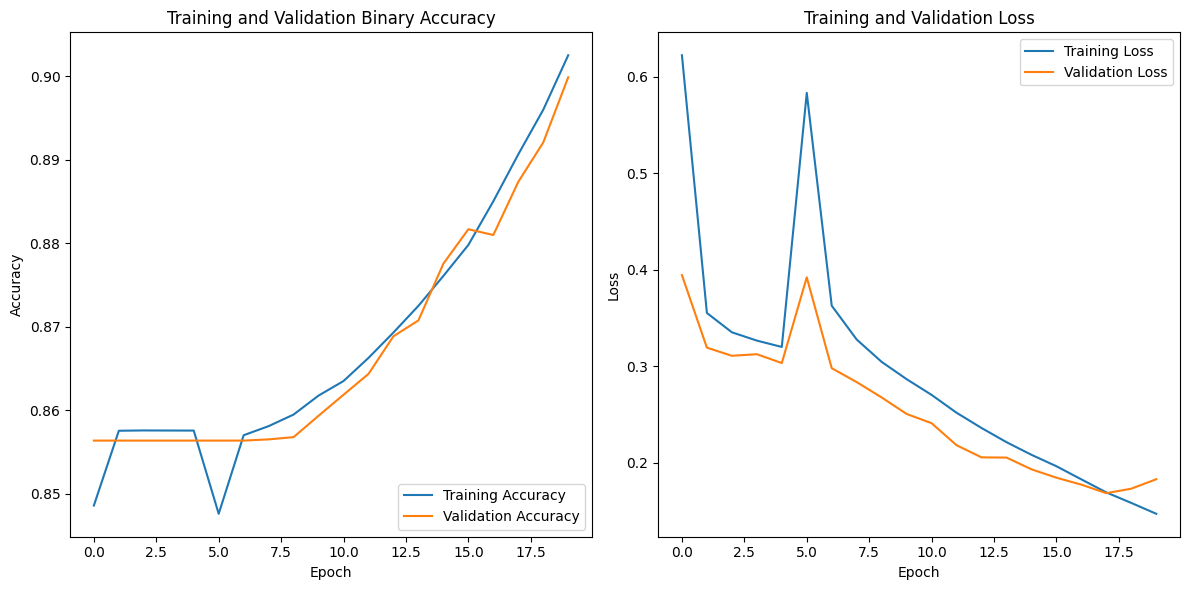

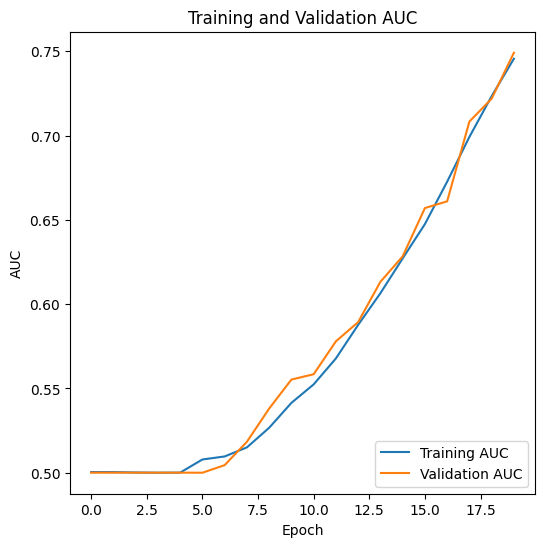


--- Evaluation and Plotting Complete ---


In [63]:
# --- Load the Best Weights ---
# The EarlyStopping callback restores best weights, but explicitly loading confirms.
print(f"Loading best weights from {checkpoint_filepath}...")
model.load_weights(checkpoint_filepath)

# --- Evaluate on the Test Set (Using test_generator_custom) ---
print("\n--- Evaluating Model on Test Set ---")

results = model.evaluate(
    test_generator_custom,
    steps=len(test_generator_custom)
)

print("\n--- Test Set Performance ---")
# Metrics order matches the compile step: Loss, binary_accuracy, auc
print(f"Test Loss: {results[0]:.4f}")
print(f"Test Binary Accuracy: {results[1]:.4f}")
print(f"Test AUC: {results[2]:.4f}")


# --- Plot Training History ---
# Combine history from both phases
history = {
    key: history_phase1.history[key] + history_phase2.history[key]
    for key in history_phase1.history.keys()
}

acc = history['binary_accuracy']
val_acc = history['val_binary_accuracy']
loss = history['loss']
val_loss = history['val_loss']
epochs_range = range(len(acc))

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Binary Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()

# Plot AUC
auc = history['auc']
val_auc = history['val_auc']
plt.figure(figsize=(6, 6))
plt.plot(epochs_range, auc, label='Training AUC')
plt.plot(epochs_range, val_auc, label='Validation AUC')
plt.legend(loc='lower right')
plt.title('Training and Validation AUC')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.show()

print("\n--- Evaluation and Plotting Complete ---")


--- Generating predictions for Classification Report ---
235/235 ━━━━━━━━━━━━━━━━━━━━ 156s 646ms/step
Extracting true labels from the test generator...
  Processed batch 50/235
  Processed batch 100/235
  Processed batch 150/235
  Processed batch 200/235
Finished extracting labels. Shape: (7520, 8)
Shape of y_true (true labels): (7520, 8)
Shape of y_pred_binary (predictions): (7520, 8)

--- Classification Report (Per Class) ---
              precision    recall  f1-score   support

      Normal       0.95      0.02      0.04      1857
    Diabetes       0.99      0.16      0.27      1756
    Glaucoma       0.90      0.29      0.43      1139
    Cataract       0.98      0.63      0.77       928
         AMD       1.00      0.08      0.14       612
Hypertension       0.99      0.12      0.22       600
      Myopia       0.99      0.49      0.66       650
       Other       1.00      0.21      0.35      1082

   micro avg       0.97      0.22      0.36      8624
   macro avg       0.97  

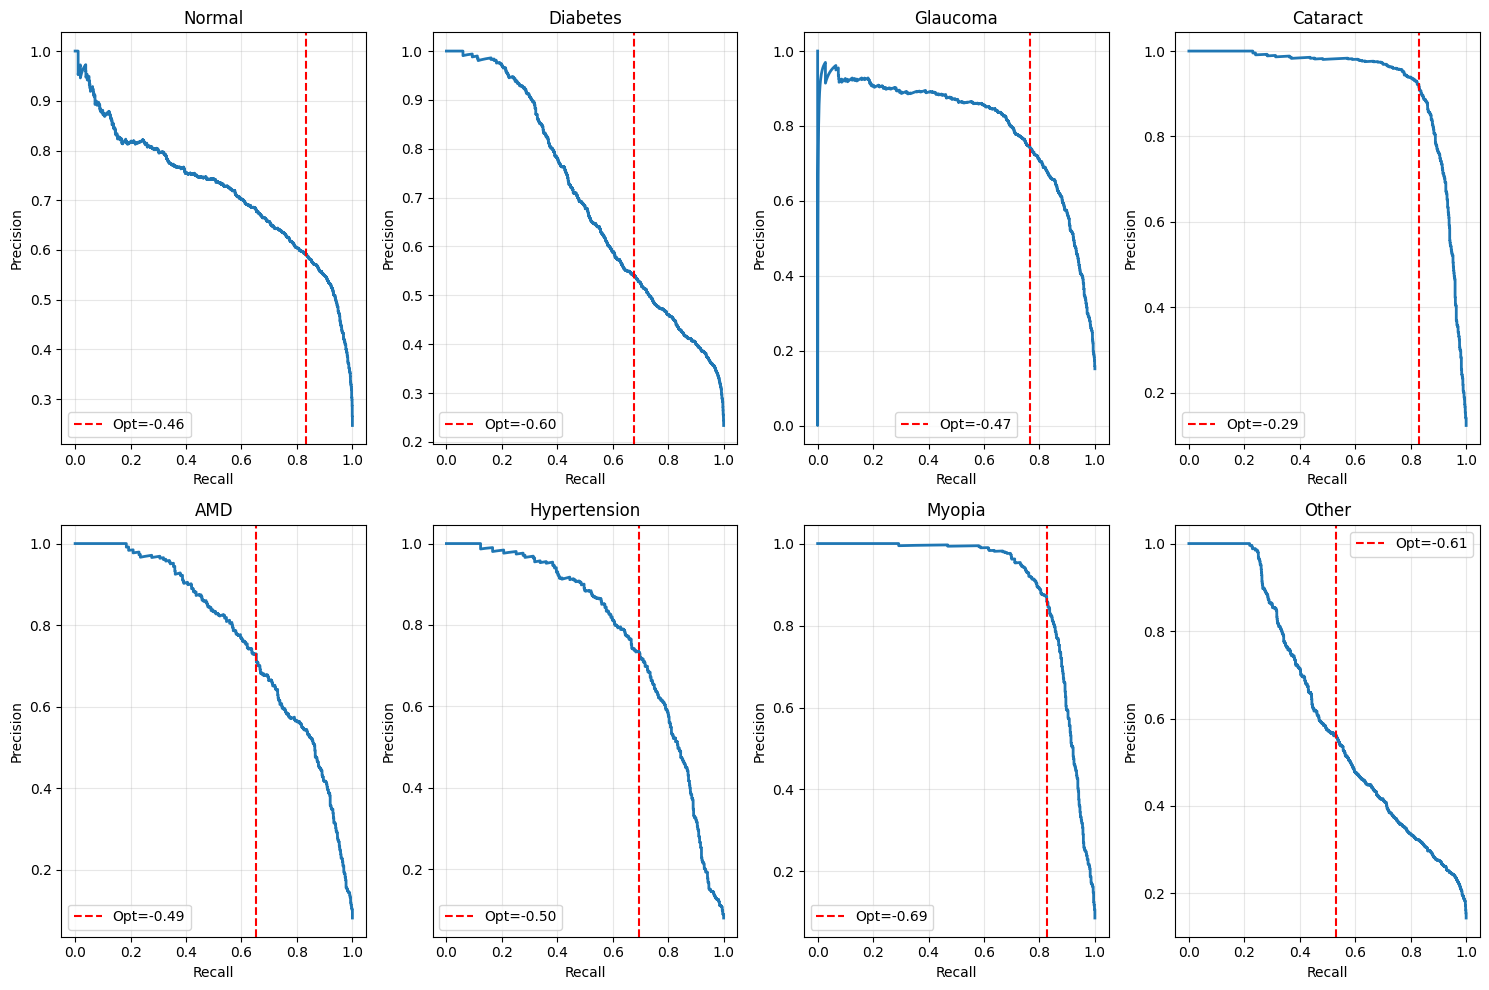


--- Optimal Thresholds ---
Normal         : -0.459
Diabetes       : -0.596
Glaucoma       : -0.467
Cataract       : -0.292
AMD            : -0.489
Hypertension   : -0.496
Myopia         : -0.688
Other          : -0.614

--- Results with Custom Thresholds ---
              precision    recall  f1-score   support

      Normal       0.59      0.83      0.69      1857
    Diabetes       0.54      0.68      0.60      1756
    Glaucoma       0.75      0.77      0.76      1139
    Cataract       0.92      0.83      0.87       928
         AMD       0.73      0.65      0.69       612
Hypertension       0.73      0.69      0.71       600
      Myopia       0.87      0.83      0.85       650
       Other       0.56      0.53      0.55      1082

   micro avg       0.66      0.73      0.69      8624
   macro avg       0.71      0.73      0.71      8624
weighted avg       0.67      0.73      0.70      8624
 samples avg       0.69      0.75      0.71      8624


--- Comparison: Standard 0.5 vs Cu

In [64]:
# === ADD THIS CODE BLOCK AFTER PLOTTING ===

import numpy as np
from sklearn.metrics import classification_report, precision_recall_curve
import matplotlib.pyplot as plt

# --- 1. Get Predictions from the Test Set ---
print("\n--- Generating predictions for Classification Report ---")

# Reset the generator to ensure it starts from the beginning


# Predict probabilities
y_pred_proba = model.predict(
    test_generator_custom,
    steps=len(test_generator_custom), # Predict for all batches
    verbose=1
)

# --- 2. Apply Threshold to get Binary Predictions ---
threshold = 0.5
y_pred_binary = (y_pred_proba >= threshold).astype(int)

# --- 3. Get True Labels from the Custom Generator ---
print("Extracting true labels from the test generator...")
y_true = []
num_test_batches = len(test_generator_custom)

for i in range(num_test_batches):
    # Get batch data (images, labels) - Adjust if your generator yields differently
   try:
        _, labels_batch = test_generator_custom[i]
        y_true.extend(labels_batch) # Add the labels from the batch to our list
   except Exception as e:
        print(f"Error getting batch {i}: {e}")
#        # Decide how to handle errors, maybe break or continue
        break
   if (i + 1) % 50 == 0: # Print progress
        print(f"  Processed batch {i+1}/{num_test_batches}")

# Convert list of label arrays/lists into a single NumPy array
y_true = np.array(y_true)

print(f"Finished extracting labels. Shape: {y_true.shape}")

# --- 4. Ensure Shapes Match (Very Important!) ---
print(f"Shape of y_true (true labels): {y_true.shape}")
print(f"Shape of y_pred_binary (predictions): {y_pred_binary.shape}")

# If the number of samples doesn't match exactly (sometimes happens with generators)
# Slice the predictions array to match the number of true labels collected.
if y_true.shape[0] != y_pred_binary.shape[0]:
    print(f"Warning: Mismatch in number of samples. Adjusting predictions ({y_pred_binary.shape[0]}) to match true labels ({y_true.shape[0]}).")
    min_samples = min(y_true.shape[0], y_pred_binary.shape[0])
    y_true = y_true[:min_samples]
    y_pred_binary = y_pred_binary[:min_samples]
    y_pred_proba = y_pred_proba[:min_samples]
    print(f"Adjusted shapes: y_true={y_true.shape}, y_pred_binary={y_pred_binary.shape}")

# --- 5. Generate and Print the Classification Report ---
# Define the names for your 8 classes in the correct order: [N, D, G, C, A, H, M, O]
class_names = ['Normal', 'Diabetes', 'Glaucoma', 'Cataract', 'AMD', 'Hypertension', 'Myopia', 'Other']

print("\n--- Classification Report (Per Class) ---")
# Use zero_division=0 to prevent warnings if a class has no predictions or no true samples in the test set
report = classification_report(y_true, y_pred_binary, target_names=class_names, zero_division=0)
print(report)

print("\n--- Overall Sample-Based Metrics (Micro/Macro Averages) ---")
try:
    report_dict = classification_report(y_true, y_pred_binary, target_names=class_names, output_dict=True, zero_division=0)
    print(f"Macro Avg F1-Score: {report_dict['macro avg']['f1-score']:.4f}")
    print(f"Weighted Avg F1-Score: {report_dict['weighted avg']['f1-score']:.4f}")
    print(f"Micro Avg F1-Score: {report_dict['micro avg']['f1-score']:.4f}") # Often useful for multi-label
except Exception as e:
    print(f"Could not calculate dictionary report: {e}")

# --- 6. OPTIMAL THRESHOLD RECOMMENDATION ---
print("\n--- Finding Optimal Thresholds Per Class ---")

optimal_thresholds = {}

plt.figure(figsize=(15, 10))
for i, class_name in enumerate(class_names):
    # Get precision-recall curve
    precision, recall, thresholds = precision_recall_curve(
        y_true[:, i], 
        y_pred_proba[:, i]
    )
    
    # Find threshold that maximizes F1-score
    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)
    best_idx = np.argmax(f1_scores)
    best_threshold = thresholds[best_idx] if best_idx < len(thresholds) else 0.5
    optimal_thresholds[class_name] = best_threshold
    
    # Plot
    plt.subplot(2, 4, i+1)
    plt.plot(recall, precision, linewidth=2)
    plt.axvline(recall[best_idx], color='r', linestyle='--', 
                label=f'Opt={best_threshold:.2f}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'{class_name}')
    plt.legend()
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print optimal thresholds
print("\n--- Optimal Thresholds ---")
for name, thresh in optimal_thresholds.items():
    print(f"{name:15s}: {thresh:.3f}")

# Apply custom thresholds
threshold_array = np.array([optimal_thresholds[name] for name in class_names])
y_pred_custom = (y_pred_proba >= threshold_array).astype(int)

# Evaluate with custom thresholds
print("\n--- Results with Custom Thresholds ---")
report_custom = classification_report(y_true, y_pred_custom, target_names=class_names, zero_division=0)
print(report_custom)

# Comparison
print("\n--- Comparison: Standard 0.5 vs Custom Thresholds ---")
try:
    report_dict_custom = classification_report(y_true, y_pred_custom, target_names=class_names, output_dict=True, zero_division=0)
    print(f"Standard (0.5) - Macro F1: {report_dict['macro avg']['f1-score']:.4f}")
    print(f"Custom Thresh  - Macro F1: {report_dict_custom['macro avg']['f1-score']:.4f}")
    improvement = (report_dict_custom['macro avg']['f1-score'] - report_dict['macro avg']['f1-score']) * 100
    print(f"Improvement: {improvement:+.2f}%")
except Exception as e:
    print(f"Could not calculate comparison: {e}")

# Multi-disease analysis
multi_disease_true = (y_true.sum(axis=1) > 1).sum()
multi_disease_pred = (y_pred_custom.sum(axis=1) > 1).sum()
print(f"\nMulti-disease samples (true): {multi_disease_true}")
print(f"Multi-disease samples (pred): {multi_disease_pred}")

# === END OF ADDED CODE BLOCK ===

In [65]:
# Save the entire model (architecture, weights, optimizer state)
# Use the .keras format (recommended)
model.save('/kaggle/working/my_ocular_model_resnet50.keras')

print("Model saved successfully as 'my_ocular_model_resnet50.keras'")

Model saved successfully as 'my_ocular_model_resnet50.keras'
